# Introduction:
##  ** Do not run this notebook **.
This note book shows the process of data cleaning and preparation for the dataset collected in  2022 and 2023, as well as the visualization and analytic processes.
1. The main processes for cleaning 2022 and 2023 data consist of 6 processes:
    1. Consolidate CSV files excluding abnormal files.
    2. Clean abnormal files before concatenating.
    3. Consolodate all CSV files again.
    4. Keep solely necessary columns.
    5. Drop unnecessary columns.
    6. Group necessary data into one column.
2. The main stages in visualization and analysis include main 3 processes:
    1. Analyzing the increase in EV adoption.
    2. EVs and Car brands analytics.
    3. EVs and the age of vehicles analytics.

# Year 2023

## 1. Consolidate CSV files.
   Process:
   1. Gather files in the specific file path **file_path** and turn into a list.
   2. Read the CSV files and append them to **df_each**. The processes include:
       1. Try to read CSV files with **'utf-8'** first.
       ```python 
        try:
        
        df_temp = pd.read_csv(f'{file_path}/{file_list[i]}',encoding='utf-8')
        ```
       2. If the files cannot be read, change the encoding to **'latin1'** (ISO-8859-1).
       ```python
        except:
        
        df_temp = pd.read_csv(f'{file_path}/{file_list[i]}',encoding='latin1')
       ```
       3. Add the file name of Each CSV
       ```python
        df_temp['FileName'] = file_list[i]
        ```
       4. Separate the abnormal files (the files whose first column does not start with a 'date' column).
       ```python
        if 'date' in df_temp.columns[0].lower():
        
        else:
            print(f'{file_list[i]}
       ```
   3. Change column headers of each CSV file into a lower case and delete strip.
        ```python
        for i in range(len(df_each)):
            df_each[i].columns=df_each[i].columns.str.lower()
            df_each[i].columns=df_each[i].columns.str.strip()
        ```
   4. Delete null rows.
       ```python
        criteria = df_2023.columns.difference(['filename'])
        row_to_delete = df_2023[criteria].isna().all(axis=1)
        df_2023 = df_2023.drop(df_2023[row_to_delete].index)
        df_2023.dropna(how='all',inplace= True)
       ```
   5. Reset Index
       ```python
        df_2023.reset_index(drop=True,inplace=True)
       ```
     
       

In [1751]:
import pandas as pd
import os
import numpy as np
# assign the path in the file_path and apply os.listdir to make a list of all files in the path.
file_path = '/Users/sarutsunpawatr/Bath/Applied Data sciecne/Csv Data course work/csv_data_2023'
file_list = os.listdir(file_path)
df_each=[]
# read csv files from the file_path destination and append them into df_each.

for i in range(len(file_list)):
    try:
        df_temp = pd.read_csv(f'{file_path}/{file_list[i]}',encoding='utf-8')
        if 'date' in df_temp.columns[0].lower():
            df_temp['FileName'] = file_list[i]
            df_each.append(df_temp)
            
        else:
            print(f'{file_list[i]} does not start with date column, should be checked')
    except:
        df_temp = pd.read_csv(f'{file_path}/{file_list[i]}',encoding='latin1')
        if 'date' in df_temp.columns[0].lower():
            df_temp['FileName'] = file_list[i]
            df_each.append(df_temp)
        else:
            print(f'{file_list[i]} does not start with date column, should be checked')
        df_each.append(df_temp)
for i in range(len(df_each)):
    df_each[i].columns=df_each[i].columns.str.lower()
    df_each[i].columns=df_each[i].columns.str.strip()
# concate each elements in df_each and then drop null values. After that, reset the index of the table
df_2023 = pd.concat(df_each,ignore_index=True)
criteria = df_2023.columns.difference(['filename']) # get all columns excluding column 'filename'
row_to_delete = df_2023[criteria].isna().all(axis=1) # find rows where all data is NaN
df_2023 = df_2023.drop(df_2023[row_to_delete].index)# Drop the rows where all data is NaN.
df_2023.dropna(how='all',inplace= True)
df_2023.reset_index(drop=True,inplace=True)# reset the file indexing.


22792769.csv does not start with date column, should be checked
22792787.csv does not start with date column, should be checked


In [1752]:
df_2023

,date,time,direction,type,occupancy,color,public/private,filename,is_carpool,is_rideshare,...,make,green badge,public / private,zero emission,class_of_the_vehicle,is_env_friendly,year,part of mobility service,date of car,unnamed: 7
0,23-10-2023,10.30am,out,car,20,grey,private,22792703.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23-10-2023,10.30am,out,car,20,other,private,22792703.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23-10-2023,10.30am,out,car,20,grey,private,22792703.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23-10-2023,10.30am,out,van,50,white,public,22792703.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23-10-2023,10.30am,out,van,100,NaN,public,22792703.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8270,27/10/2023,08:55am,out,Car,1,NaN,NaN,22792726.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017/2018,NaN
8271,27/10/2023,08:55am,out,Car,1,NaN,NaN,22792726.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017/2018,NaN
8272,27/10/2023,08:55am,out,Bus,20%,NaN,NaN,22792726.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016/2017,NaN
8273,27/10/2023,08:55am,out,Car,1,NaN,NaN,22792726.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012/2013,NaN


# 2. Clean abnormal files before concatenating

## Cleaning Process:

1. Check the abnormal files.
2. Append the file name.
3. Address the wrong points.

### 22792769.csv
process :
1. Add the filename column.
2. Change the column names.
3. drop the first three rows.
4. Delete null rows
5. Reset null rows

In [1753]:
# Inspect the file.
df_22792769 = pd.read_csv(f'{file_path}/22792769.csv',encoding='utf-8') # Read the file and change it into the dataframe.
df_22792769['filename'] = 'df_22792769'
df_22792769.columns = df_22792769.columns.str.lower() # change the names of the columns into a lowercase. 
df_22792769

,unnamed: 0,unnamed: 1,unnamed: 2,unnamed: 3,unnamed: 4,unnamed: 5,unnamed: 6,unnamed: 7,unnamed: 8,unnamed: 9,unnamed: 10,unnamed: 11,unnamed: 12,unnamed: 13,unnamed: 14,filename
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,df_22792769
1,DATE,Time,Direction,Vehical Type,NaN,NaN,NaN,NaN,NaN,NaN,Occupancy,Gender Of Driver,NaN,Outside University,NaN,df_22792769
2,NaN,AM,NaN,CAR,BUS,BICYCLE,MOTORBIKE,TAXI,SCOOTER,VAN,NaN,MALE,FEMALE,Left,Right,df_22792769
3,25-10-23,10:30am,OUT,✓,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,✓,NaN,✓,df_22792769
4,25-10-23,10:30am,OUT,✓,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,✓,NaN,✓,df_22792769
5,25-10-23,10:30am,OUT,✓,NaN,NaN,NaN,NaN,NaN,NaN,1,✓,NaN,NaN,✓,df_22792769
6,25-10-23,10:30am,OUT,NaN,✓,NaN,NaN,NaN,NaN,NaN,20%,✓,NaN,NaN,✓,df_22792769
7,25-10-23,10:31am,OUT,NaN,✓,NaN,NaN,NaN,NaN,NaN,20%,✓,NaN,NaN,✓,df_22792769
8,25-10-23,10:31am,OUT,✓,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,✓,✓,NaN,df_22792769
9,25-10-23,10:32am,OUT,NaN,NaN,NaN,NaN,NaN,NaN,✓,1,✓,NaN,NaN,✓,df_22792769


In [1754]:
# Rename all columns with their value.
df_22792769.rename(columns={'unnamed: 0': 'date'}, inplace=True)
df_22792769.rename(columns={'unnamed: 1': 'time'}, inplace=True)
df_22792769.rename(columns={'unnamed: 2': 'direction'}, inplace=True)
df_22792769.rename(columns={'unnamed: 3': 'car'}, inplace=True)
df_22792769.rename(columns={'unnamed: 4': 'bus'}, inplace=True)
df_22792769.rename(columns={'unnamed: 5': 'bicycle'}, inplace=True)
df_22792769.rename(columns={'unnamed: 6': 'motorbike'}, inplace=True)
df_22792769.rename(columns={'unnamed: 7': 'taxi'}, inplace=True)
df_22792769.rename(columns={'unnamed: 8': 'scooter'}, inplace=True)
df_22792769.rename(columns={'unnamed: 9': 'van'}, inplace=True)
df_22792769.rename(columns={'unnamed: 10': 'occupancy'}, inplace=True)
df_22792769.rename(columns={'unnamed: 11': 'male'}, inplace=True)
df_22792769.rename(columns={'unnamed: 12': 'female'}, inplace=True)
df_22792769.rename(columns={'unnamed: 13': 'left'}, inplace=True)
df_22792769.rename(columns={'unnamed: 14': 'right'}, inplace=True)

In [1755]:
df_22792769.drop(df_22792769.index[0:3],axis=0,inplace = True) # Drop the first three columns.
criteria = df_22792769.columns.difference(['filename']) # get all columns excluding column 'filename'
row_to_delete = df_22792769[criteria].isna().all(axis=1) # find rows where all data is NaN
df_22792769 = df_22792769.drop(df_22792769[row_to_delete].index) # Drop the rows where all data is NaN.
df_22792769.dropna(how='all',inplace= True)
df_22792769.reset_index(inplace =True) # reset the file indexing.
df_22792769 # Inspect the file

,index,date,time,direction,car,bus,bicycle,motorbike,taxi,scooter,van,occupancy,male,female,left,right,filename
0,3,25-10-23,10:30am,OUT,✓,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,✓,NaN,✓,df_22792769
1,4,25-10-23,10:30am,OUT,✓,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,✓,NaN,✓,df_22792769
2,5,25-10-23,10:30am,OUT,✓,NaN,NaN,NaN,NaN,NaN,NaN,1,✓,NaN,NaN,✓,df_22792769
3,6,25-10-23,10:30am,OUT,NaN,✓,NaN,NaN,NaN,NaN,NaN,20%,✓,NaN,NaN,✓,df_22792769
4,7,25-10-23,10:31am,OUT,NaN,✓,NaN,NaN,NaN,NaN,NaN,20%,✓,NaN,NaN,✓,df_22792769
5,8,25-10-23,10:31am,OUT,✓,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,✓,✓,NaN,df_22792769
6,9,25-10-23,10:32am,OUT,NaN,NaN,NaN,NaN,NaN,NaN,✓,1,✓,NaN,NaN,✓,df_22792769
7,10,25-10-23,10:32am,OUT,NaN,NaN,NaN,NaN,NaN,NaN,✓,1,✓,NaN,✓,NaN,df_22792769
8,11,25-10-23,10:33am,OUT,✓,NaN,NaN,NaN,NaN,NaN,NaN,1,✓,NaN,NaN,✓,df_22792769
9,12,25-10-23,10:33am,OUT,✓,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,✓,NaN,✓,df_22792769


### 22792787.csv
process :
1. Add the filename column.
2. Drop the first column.

In [1756]:
df_22792787 = pd.read_csv(f'{file_path}/22792787.csv',encoding='utf-8') # Read the file and turn it into the dataframe.
df_22792787['filename'] = 'df_22792787'
criteria = df_22792787.columns.difference(['filename']) # select all columns excluding 'filename'
row_to_delete = df_22792787[criteria].isna().all(axis=1) # find rows that all data is NaN
df_22792787 = df_22792787.drop(df_22792787[row_to_delete].index) # Drop the rows that all data is NaN
df_22792787.dropna(how='all',inplace= True)
df_22792787.drop(df_22792787.columns[0],axis = 1,inplace = True)# Drop the first column because it is unnamed

In [1757]:
df_22792787 # Inspect the file.

,date,time,direction,vehicle_type,occupancy,safety,manufacturing_data,manufactured_after_2015,filename
0,25/10/2023,09:30,in,car,1,1.0,55.0,0.0,df_22792787
1,25/10/2023,09:30,in,car,2,1.0,17.0,1.0,df_22792787
2,25/10/2023,09:30,in,car,1,1.0,71.0,1.0,df_22792787
3,25/10/2023,09:30,in,car,1,1.0,77.0,NaN,df_22792787
4,25/10/2023,09:30,in,car,1,1.0,61.0,0.0,df_22792787
...,...,...,...,...,...,...,...,...,...
128,25/10/2023,09:55,in,van,2,1.0,50.0,0.0,df_22792787
129,25/10/2023,09:55,in,van,1,1.0,73.0,1.0,df_22792787
130,25/10/2023,09:55,in,van,1,1.0,21.0,1.0,df_22792787
131,25/10/2023,09:55,in,lorry,1,1.0,73.0,1.0,df_22792787


# 3. Consolidate files
Process:
1. Concate all dataframes.
2. Drop rows that contain ```NaN``` values in all columns.
3. Reset Index after dropping
4. Change column names into lower case and remove the strip.
5. Check all columns and select which columns should be selected.

In [1758]:
df_2023 = pd.concat([df_2023,df_22792769,df_22792787],ignore_index=True) # consolidate the cleaned files with df_2023.
df_22792769.dropna(how='all',inplace= True)# Drop the rows that all values are Nan
df_2023 = df_2023.reset_index(drop=True) # Reset Dataframe Index.
df_2023.columns = df_2023.columns.str.lower().str.strip() # Change column names into lower case and remove the strip.

In [1759]:
df_2023.keys()

Index(['date', 'time', 'direction', 'type', 'occupancy', 'color',
       'public/private', 'filename', 'is_carpool', 'is_rideshare',
       'additionaldata1', 'additionaldata2', 'driver gender', 'fuel type',
       'is electric', 'service', 'size', 'vehicle purpose',
       'vehicle age(years)', 'brand name', 'colour', 'turn signal', 'carpool',
       'rideshare', 'type of vehicle', 'class of the vehicle', 'electric',
       'family car', 'tint > 50%?', 'high tinted area', 'weather', 'area_code',
       'vehicle type', 'vehicle occupancy', 'brand', 'vehicle category',
       'green vehicle', 'date code', 'age group', 'eco-friendly',
       'vehicle brand', 'vehicle year', 'ev', 'car brand', 'driver_gender',
       'mode_of_travel', 'ageidentifier', 'left', 'right', 'car', 'bus',
       'bicycle', 'motorbike', 'taxi', 'scooter', 'van', 'male', 'female',
       'mobilityservice', 'window_tint', 'rim_type', 'age identifier',
       'safety', 'manufacturing data', 'manufactured after 2015'

# Analytical Approach
### 1. Data Exploration
   - Commence by inspecting all column names in the data set.
### 2. Analysis of column names.
   - Based on the column names, make educated guess which value that the column represents such as 'ev','eco-friendly' might contain the same kind of data.
### 3. Focus on Electric Vehicles(EV)
   - Given the dominant columns about EV, This area will be the primary focus of my analysis.
### 4. Selection of additional columns for In-Depth analysis.
   - Determine additional columns the can be effectively analysed along with EV data. 
### 5. Key Columns for Enhanced EV Insight:
   - Select column related to age identifier or car brands as additional columns. These will serve as key variables to explore trends, patterns, and correlations in EV data,.



# Hypothesis
1. ```Growth Hypothesis```: The proportion of EV cars to all cars should be higher from 2022 to 2023, according to Society of Motor Manufacturers and Traders research [1]. This hypothesis will be tested by comparing the proportion of EV cars to all cars across the two years to identify growth trends.
2. ```Brand Preference Hypothesis```: This hypothesis is that the brand preferences of the bath community should mirror UK trends[2]. Brands that are popular in the UK may also see similar popularity in bath as well. In order to answer this hypothesis, the proportion of EVs from different brands in the Bath community and the UK should be compared.
3. ```Vehicle ages and EV adoption rate Hypothesis```: The hypothesis suggests that the new cars are more likely to be EVs. As a consequence of these events and policies [3][4] :
    1. European Union’s CO2 emissions standards
    2. The growing number of EV charging infrastructure
    3. Government Increased subsidy schemes.<br>  
 
     To test this hypothesis, I will examine the distribution of EVvehicle ages in the Bath community.</p>
     
# References
1. Society of Motor Manufacturers and Traders, 2023. September new car market grows but motorist support needed to reverse falling private consumer EV demand [Online]. Available from: https://www.smmt.co.uk/2023/10/september-new-car-market-grows-but-motorist-support-needed-to-reverse-falling-private-consumer-ev- demand/[Accessed 20 November 2023].
2. Statista, 2023. Electric Vehicles - United Kingdom [Online]. Available from: https://www.statista.com/outlook/mmo/electric-vehicles/united-kingdom [Accessed 20 November 2023].
3. International Energy Agency, 2021. Global EV Outlook 2021: Trends and
developments in electric vehicle markets [Online]. Available from: https://www.iea.org/reports/global-ev-outlook-2021/trends-and-developments-in-electric-vehicle-markets [Accessed 21 November 2023].
4. UK Government, 2023. Electric vehicle charging device statistics: January 2023 [Online]. Available from: https://www.gov.uk/government/statistics/electric- vehicle-charging-device-statistics-january-2023/electric-vehicle-charging-device- statistics-january-2023 [Accessed 21 November 2023].

# 4. Keep solely necessary columns (EV, age of cars, and brands of cars) .

The process:
1. List the ```Including_word``` that are probably useful for extracting the necessary columns from all columns
2. Loop over all columns and keep columns that matchs with Including_word.
    The process
    1. loop over each column in ```df_2023```
    2. loop over word in: ```Including_word```
    3. if word in col, then append the ```keep_cols``` list and match_word will turn to 1 and continue (prevent duplicating)
    4. keep solely ```keep_cols``` columns

In [1760]:
# list the useful keywords for extracting the columns
Including_word = ['age','date','time','fuel','electric','brand','type','green','eco','ev','vehicle type','friendly','env','emission','car','bus',
                  'bicycle','motorbike','taxi','scooter','van','filename','make','direction']
keep_cols = [] # Empty list 
for col in df_2023.columns: # loop over each column in df_2023 
    match_word = 0
    for word in Including_word: # loop over word in Including_word
        if word in col: # Matching col and word
            keep_cols.append(col)
            match_word = 1 # if we find that word in col match_word change from 0 to 1
            break
    if match_word == 1: # if match_word = 1, the program will tranfer to the next loop in order to not duplicate a column.
        continue
df_2023 = df_2023[keep_cols]
df_2023.keys()

Index(['date', 'time', 'direction', 'type', 'filename', 'is_carpool',
       'fuel type', 'is electric', 'vehicle age(years)', 'brand name',
       'carpool', 'type of vehicle', 'electric', 'family car', 'vehicle type',
       'brand', 'green vehicle', 'date code', 'age group', 'eco-friendly',
       'vehicle brand', 'ev', 'car brand', 'ageidentifier', 'car', 'bus',
       'bicycle', 'motorbike', 'taxi', 'scooter', 'van', 'rim_type',
       'age identifier', 'hasgreennumberplate', 'ecofriendly',
       'date of vehicle', 'age_id', 'is_env_fr', 'zero emissions',
       'low emissions compliant', 'make', 'green badge', 'zero emission',
       'is_env_friendly', 'date of car', 'vehicle_type'],
      dtype='object')

# 5. Drop unnecessary columns
Process:
1. Check the name of columns
2. drop the columns that are not necessary

In [1761]:
df_2023.keys()

Index(['date', 'time', 'direction', 'type', 'filename', 'is_carpool',
       'fuel type', 'is electric', 'vehicle age(years)', 'brand name',
       'carpool', 'type of vehicle', 'electric', 'family car', 'vehicle type',
       'brand', 'green vehicle', 'date code', 'age group', 'eco-friendly',
       'vehicle brand', 'ev', 'car brand', 'ageidentifier', 'car', 'bus',
       'bicycle', 'motorbike', 'taxi', 'scooter', 'van', 'rim_type',
       'age identifier', 'hasgreennumberplate', 'ecofriendly',
       'date of vehicle', 'age_id', 'is_env_fr', 'zero emissions',
       'low emissions compliant', 'make', 'green badge', 'zero emission',
       'is_env_friendly', 'date of car', 'vehicle_type'],
      dtype='object')

In [1762]:
# list unnecessary columns in the left_cols and drop them.
Drop_list = ['is_carpool','carpool','family car','rim_type','hasgreennumberplate','green badge','age group']
df_2023 = df_2023.drop(columns=Drop_list,axis=1)

# 6. Group necessary data into one column.
The necessary data including:
1. EV
2. Type
3. Brand
4. Age identifier
5. Date
6. Time
7. Direction

### 6.1 EV
Process : 
1. list the keywords of possible related EV columns.
2. Append the name of columns to ```EV_Support```.
3. Fill the EV column ```NaN``` values with the values that have been appended to ```EV_Support```.
4. Change the values into lower case and remove the strip.
5. Check the values inside the columns ```EV```
6. Change the same purposed values into one kind (ex. change electric, electrics into 1)
7. Drop columns in the ```EV_Support``` list.
8. Remove the rows where ```EV``` values are NaN

In [1763]:
# list vital keywords for gathering the EV information
EV_Process = ['electric','fuel','green','eco','friendly','zero emissions','low emissions','env','ev','zero emission']
EV_Support = [] # create a empty list to append the names of columns that match with the keywords.
df_2023['EV'] = np.nan # create new column to gather all 'EV' data.
for col in df_2023.columns:
    for keyword in EV_Process:
        if keyword in col:
            EV_Support.append(col)
            break
print(EV_Support)
for i in EV_Support:
    df_2023['EV'] = df_2023['EV'].fillna(df_2023[i]) # fill NaN with the EV value from the related EV columns.
df_2023['EV']=df_2023['EV'].astype(str).str.lower().str.strip() #turn the values into lower case and remove strip.

['fuel type', 'is electric', 'electric', 'green vehicle', 'eco-friendly', 'ev', 'ecofriendly', 'is_env_fr', 'zero emissions', 'low emissions compliant', 'zero emission', 'is_env_friendly']


In [1764]:
df_2023['EV'].unique() # check values inside EVgather

array(['nan', 'ice', 'zev', 'no', 'yes', 'n', 'y', 'conventional',
       'clean technology', 'non ev', 'ev', '0', '1', '0.0', '1.0'],
      dtype=object)

In [1765]:
Conditions = ('zev','yes','y','clean technology','ev',1,'1',1.0,'1.0') 
df_2023['EV'] = np.where(df_2023['EV'].isin(Conditions),1,df_2023['EV']) # If the values in the 'EV' column match with condition, turing them to 1.
Conditions = ('ice','no','n','conventional','non ev',0,'0',0.0,'0.0')
df_2023['EV'] = np.where(df_2023['EV'].isin(Conditions),0,df_2023['EV']) #If the values in  the 'EV' column match with condition, turing them to 0.
df_2023['EV'] = np.where(df_2023['EV']=='nan',np.nan,df_2023['EV'])

In [1766]:
df_2023=df_2023.drop(columns=EV_Support,axis=1) # Drop columns in EV_support

In [1767]:
df_2023['EV'].unique()

array([nan, 0, 1], dtype=object)

In [1768]:
df_2023 = df_2023[df_2023['EV'].notna()] # Select only the rows where their 'EV' is not NaN
df_2023 = df_2023.reset_index(drop = True) # Reset the Index of the dataframe.
df_2023 

,date,time,direction,type,filename,vehicle age(years),brand name,type of vehicle,vehicle type,brand,...,taxi,scooter,van,age identifier,date of vehicle,age_id,make,date of car,vehicle_type,EV
0,"Tuesday, 24 October 2023",10:15:00 AM,IN,car,22792714.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,"Tuesday, 24 October 2023",10:15:00 AM,IN,truck,22792714.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,"Tuesday, 24 October 2023",10:15:00 AM,IN,bus,22792714.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,"Tuesday, 24 October 2023",10:15:00 AM,IN,bus,22792714.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,"Tuesday, 24 October 2023",10:15:00 AM,IN,truck,22792714.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,27/10/2023,08:55am,out,Lorry,22792726.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021/2022,NaN,1
2809,27/10/2023,08:55am,out,Car,22792726.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016/2017,NaN,1
2810,27/10/2023,08:55am,out,Car,22792726.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022/2023,NaN,1
2811,27/10/2023,08:55am,out,Bicycle,22792726.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


### 6.2 Type
Process : 
1. Change the value from '✓' to the column's name (22792769.csv).
2. list the keywords of possible related Type columns.
3. Append the name of columns to ```Type_Support```.
4. Fill the Type column ```NaN``` values with the values that have been appended to ```Type_Support```.
5. Change the values into lower case and remove the strip.
6. Check the values inside the columns ```Type```.
7. Change the same purposed values into one kind.
8. Change the 'electric car' type to the 'car' type.
9. Replace the 'car' type with 1 and other types with 0.
10. Drop columns in the ```Type_Support``` list.
11. Select the rows that contain '1' in the ```Type``` Column, because I will analyse only the car type.


In [1769]:
Change_list = ['car','bus','bicycle','motorbike','taxi','scooter','van'] # list names of columns needed to change.
for i in  Change_list: # check values inside each column.
    print(df_2023[i].unique(), i)

[nan] car
[nan] bus
[nan] bicycle
[nan] motorbike
[nan] taxi
[nan] scooter
[nan] van


In [1770]:
#replace '✓' with the name of the columns and set it to be lower charactor.
for i in Change_list:
    df_2023[i] = df_2023[i].replace('✓',i)

In [1771]:
support_columns =[]
df_2023['type_from_checkbox'] = np.nan #add a new column to consolidate all check-box columns
for col in df_2023.columns:
    for change in Change_list[:7]:
        if change == col:
            support_columns.append(col)
            break
print(support_columns) # check each column that will be added to df_2023['Type_from_checkbox']
for i in support_columns:
    df_2023['type_from_checkbox'] = df_2023['type_from_checkbox'].fillna(df_2023[i])
df_2023['type_from_checkbox'].unique() # check if the value was added to the column.



['car', 'bus', 'bicycle', 'motorbike', 'taxi', 'scooter', 'van']


array([nan])

In [1772]:
df_2023 = df_2023.drop(columns = Change_list,axis=1)

In [1773]:
# list vital keywords for gathering the Type information
Type_Process = ['type','type_from_checkbox'] 
df_2023['Type'] = np.nan #create new column to gather all 'Type' data.
Type_Support = [] #create an empty list to append the names of columns that match with the keywords.
for col in df_2023.columns:#loop over columns
    for keyword in Type_Process:# loop over Type_Process
        if keyword in col:# Match col and keyword
            Type_Support.append(col)
            break
print(Type_Support)# check each column that will be added to df_2023['Type']
for i in Type_Support:
    df_2023['Type'] = df_2023['Type'].fillna(df_2023[i])# fill NaN with the 'Type' value from the related 'Type' columns. 


['type', 'type of vehicle', 'vehicle type', 'vehicle_type', 'type_from_checkbox']


In [1774]:
df_2023['Type']=df_2023['Type'].astype(str).str.lower().str.strip() # turn the values into lower case and remove strip.
df_2023['Type']

0           car
1         truck
2           bus
3           bus
4         truck
         ...   
2808      lorry
2809        car
2810        car
2811    bicycle
2812        bus
Name: Type, Length: 2813, dtype: object

In [1775]:
df_2023['Type'].unique()

array(['car', 'truck', 'bus', 'bicycle', 'motorbike', 'van', 'taxi',
       'lorry', 'scooter', 'motor', 'bike'], dtype=object)

In [1776]:
Conditions = ('car','c')
df_2023['Type']=np.where(df_2023['Type'].isin(Conditions),1,0) # if the values in the 'Type' column match with the Conditions, then change them to 1.

In [1777]:
df_2023 = df_2023.drop(columns = Type_Support,axis=1)# Drop columns in Ageid_Support
df_2023=df_2023.reset_index(drop=True) # reset the dataframe's index.

In [1778]:
df_2023['Type'].unique() # Check values inside the column.

array([1, 0])

In [1779]:
df_2023 = df_2023[df_2023['Type']==1]# Select only the rows that their 'Type' value is 1
df_2023 = df_2023.reset_index(drop = True)
df_2023['Type'].unique()

array([1])

### 6.3 Brand
Process : 
1. list the keywords of possible related Brand columns.
2. Append the name of columns to ```Brand_Support```.
3. Fill the Type column ```NaN``` values with the values that have been appended to ```Brand_Support```.
4. Change the values into lower case and remove strip.
5. Check the values inside the columns ```Brand```.
6. Change the values that match with specific condition. For example: 
    ```python
df_2023['Brand']=np.where(df_2023['Brand'].str.contains('mer',na=False),'mercedes-benz',df_2023['Brand'])```
7. Check the values inside the columns ```Brand``` after changing the values.
 

In [1780]:
Brand_Process = ['brand','make'] # list keywords
df_2023['Brand'] = np.nan # create a new column to gather all 'Brand' data.
Brand_Support = [] #create an empty list to append the names of columns that match with the keywords.
for col in df_2023.columns: # loop over columns
    for keyword in Brand_Process: # loop over Brand_Process
        if keyword in col:# Matching col and keyword
            Brand_Support.append(col)# append the Brand_Support list
            break
print(Brand_Support)# check each column that will be added to df_2023['Brand']
for i in Brand_Support:
    df_2023['Brand'] = df_2023['Brand'].fillna(df_2023[i]) # fill NaN with the 'Brand' value from the related 'Brand' columns. 

['brand name', 'brand', 'vehicle brand', 'car brand', 'make']


In [1781]:
df_2023['Brand'] = df_2023['Brand'].astype(str).str.lower()  # turn the values into lowercase and remove the strip.

In [1782]:
df_2023['Brand'].unique() # check values inside the columns

array(['nan', 'ford', 'volkswagen', 'mini', 'vauxhall', 'seat', 'renault',
       'peugeot', 'skoda', 'subaru', 'benz', 'aston matin', 'kia',
       'suzuki', 'nissan', 'mg', 'citroen', 'hyundai', 'fiat', 'bmw',
       'audi', 'jeep', 'toyota', 'dacia', 'mazda', 'honda', 'volvo',
       'fiesta', 'mercedes', 'range rover', 'mitsubishi', 'lexus',
       'tesla'], dtype=object)

In [1783]:
#Change the values that match with specific conditions.
df_2023['Brand']=np.where(df_2023['Brand'].str.contains('mer',na=False),'mercedes-benz',df_2023['Brand'])
df_2023['Brand']=np.where(df_2023['Brand'].str.contains('ben',na=False),'mercedes-benz',df_2023['Brand'])
df_2023['Brand']=np.where(df_2023['Brand'].str.contains('dai',na=False),'hyundai',df_2023['Brand'])
df_2023['Brand']=np.where(df_2023['Brand'].str.contains('swa',na=False),'volkswagen',df_2023['Brand'])
df_2023['Brand']=np.where(df_2023['Brand'].str.contains('sva',na=False),'volkswagen',df_2023['Brand'])
df_2023['Brand']=np.where(df_2023['Brand'].str.contains('bwm',na=False),'bmw',df_2023['Brand'])
df_2023['Brand']=np.where(df_2023['Brand'].str.contains('peu',na=False),'peugeot',df_2023['Brand'])
df_2023['Brand']=np.where(df_2023['Brand'].str.contains('peg',na=False),'peugeot',df_2023['Brand'])
df_2023['Brand']=np.where(df_2023['Brand'].str.contains('pu',na=False),'peugeot',df_2023['Brand'])
df_2023['Brand']=np.where(df_2023['Brand'].str.contains('ci',na=False),'citroën',df_2023['Brand'])
df_2023['Brand']=np.where(df_2023['Brand'].str.contains('mi',na=False),'mini cooper',df_2023['Brand'])
df_2023['Brand']=np.where(df_2023['Brand'].str.contains('jap',na=False),'japanese brand',df_2023['Brand'])
df_2023['Brand']=np.where(df_2023['Brand'].str.contains('vaux',na=False),'vauxhall',df_2023['Brand'])
df_2023['Brand']=np.where(df_2023['Brand'].str.contains('wes',na=False),'wessex connect',df_2023['Brand'])

In [1784]:
df_2023 = df_2023.drop(columns = Brand_Support,axis=1)# Drop columns in Ageid_Support

In [1785]:
df_2023['Brand']=df_2023['Brand'].replace("nan",np.nan) # replace str 'nan' values with np.nan.

In [1786]:
df_2023['Brand'].unique() # check the values inside the column.

array([nan, 'ford', 'volkswagen', 'mini cooper', 'vauxhall', 'seat',
       'renault', 'peugeot', 'skoda', 'subaru', 'mercedes-benz',
       'aston matin', 'kia', 'suzuki', 'nissan', 'mg', 'citroën',
       'hyundai', 'fiat', 'bmw', 'audi', 'jeep', 'toyota', 'mazda',
       'honda', 'volvo', 'fiesta', 'range rover', 'lexus', 'tesla'],
      dtype=object)

### 6.4 Age Identification
Process : 
1. list the keywords of possible related Age identidication columns.
2. Append the name of columns to ```Ageid_Support```.
3. Fill the Type column ```NaN``` values with the values that have been appended to ```Ageid_Support```.
4. Change the values into lower case and remove strip.
5. Check the values inside the columns ```Ageofcars```.
6. turn str and float values where their lenght are less than 4 into int values.
7. if the len of values < 25, add 2000 up (age identifier rule)
8. if the len of values > 25, add 1950 and 1951 up (age identifier rule)
9. Drop columns in the ```Ageid_Support``` list.

In [1787]:
# list keywords.
Ageid_Process = ['date code','ageidentifier','age identifier','age_id','date of car','date of vehicle','vehicle age(years)']
df_2023['Ageofcars'] = np.nan #create a new column to gather all 'age identifier' data.
Ageid_Support = [] #create an empty list to append the names of columns that match with the keywords.
for col in df_2023.columns: # loop over columns
    for keyword in Ageid_Process : # loop over Ageid_Process
        if keyword in col: # Matching col and keyword
            Ageid_Support.append(col) # append the Ageid_Support list
            break
print(Ageid_Support) # check each column that will be added to df_2023['Age of cars']
for i in Ageid_Support:
    df_2023['Ageofcars'] = df_2023['Ageofcars'].fillna(df_2023[i]) # fill NaN with the 'Age of cars' value from the related 'age identifier' columns. 


['vehicle age(years)', 'date code', 'ageidentifier', 'age identifier', 'date of vehicle', 'age_id', 'date of car']


In [1788]:
df_2023['Ageofcars'].unique() # check if the value was added to the column.

array([nan, 16, 58, 73, 8, 62, 71, 63, 61, 64, 69, 18, 20, 60, 23, 65, 14,
       54, 66, 9, 59, 68, 6, 67, 21, '2013/2014', '2019/2020',
       '2022/2023', '2020/2021', '2023/2024', '2009/2010', '2007/2008',
       '2010/2011', '2011/2012', '2014/2015', '2018/2019', '2015/2016',
       '2017/2018', '2021/2022', '2012/2013', '2016/2017', '2004/2005',
       '2005/2006', '2006/2007', '2000/2001', '2003/2004', '2008/2009',
       57.0, 19.0, 22.0, 12.0, 11.0, 72.0, 70.0, 10.0, 31.0, 15.0, 13.0,
       17.0, 2.0, 5.0, 56.0, 7.0, '73', '15', '72', '66', '10', '71',
       '22', '21', '16', '17', 'none', '62', '63', '68', '64', '20', '12',
       '19', '13', '56', '23', '14', '18', '67', '69', '11', '61', '8',
       '59', '70', '4', '65', '44', '9', '57', '38', '7', '58', '3', '60',
       '54'], dtype=object)

In [1789]:
for i,j in enumerate(df_2023['Ageofcars']):
    if isinstance(j,float) and not np.isnan(j):# turn floats into ints. Ex. 6.0 to 6
        df_2023.loc[i,'Ageofcars'] = int(df_2023['Ageofcars'][i])
    elif isinstance(j,str) and len(j) < 4: #turn strs into ints. Ex. '11' to 11
        df_2023.loc[i,'Ageofcars'] = int(df_2023['Ageofcars'][i])
    else:
        continue

In [1790]:
df_2023['Ageofcars'].unique()

array([nan, 16, 58, 73, 8, 62, 71, 63, 61, 64, 69, 18, 20, 60, 23, 65, 14,
       54, 66, 9, 59, 68, 6, 67, 21, '2013/2014', '2019/2020',
       '2022/2023', '2020/2021', '2023/2024', '2009/2010', '2007/2008',
       '2010/2011', '2011/2012', '2014/2015', '2018/2019', '2015/2016',
       '2017/2018', '2021/2022', '2012/2013', '2016/2017', '2004/2005',
       '2005/2006', '2006/2007', '2000/2001', '2003/2004', '2008/2009',
       57, 19, 22, 12, 11, 72, 70, 10, 31, 15, 13, 17, 2, 5, 56, 7,
       'none', 4, 44, 38, 3], dtype=object)

In [1791]:
for i,j in enumerate(df_2023['Ageofcars']):
    try:
        if isinstance(j,int) and (j < 25) and not np.isnan(j): # add 2000 up to int values where their lengths are less than 25.
            df_2023.loc[i,'Ageofcars'] = int(df_2023['Ageofcars'][i]) + 2000
        elif isinstance(j,int) and (j > 25) and not np.isnan(j): # add 1950 and 1951 up to int values where their lengths are more than 25.
            df_2023.loc[i,'Ageofcars'] = f"{int(df_2023['Ageofcars'][i]) + 1950}/{int(df_2023['Ageofcars'][i]) + 1951}"
    except :
        continue
    
        
        

In [1792]:
df_2023.drop(Ageid_Support,axis=1,inplace=True) # Drop columns in Ageid_Support

In [1793]:
df_2023['Ageofcars'].unique() # check values inside columns.

array([nan, 2016, '2008/2009', '2023/2024', 2008, '2012/2013',
       '2021/2022', '2013/2014', '2011/2012', '2014/2015', '2019/2020',
       2018, 2020, '2010/2011', 2023, '2015/2016', 2014, '2004/2005',
       '2016/2017', 2009, '2009/2010', '2018/2019', 2006, '2017/2018',
       2021, '2022/2023', '2020/2021', '2007/2008', '2005/2006',
       '2006/2007', '2000/2001', '2003/2004', 2019, 2022, 2012, 2011,
       2010, '1981/1982', 2015, 2013, 2017, 2002, 2005, 2007, 'none',
       2004, '1994/1995', '1988/1989', 2003], dtype=object)

### 6.5 Direction
Process : 
1. list the keywords of possible related Direction columns.
2. Append the name of columns to ```Direction_Support```.
3. Fill the Type column ```NaN``` values with the values that have been appended to ```Direction_Support```.
4. Drop columns in the ```Direction_Support``` list.

In [1794]:
Direction_Process = ['di'] # list keywords.
df_2023['Direction'] = np.nan # create a new column to gather all 'direction' data.
Direction_Support = []#create an empty list to append the names of columns that match with the keywords.
for col in df_2023.columns: # loop over columns
    for keyword in Direction_Process:# loop over Direction_Process
        if keyword in col:# Matching col and keyword
            Direction_Support.append(col)# append the Direction_Support list
            break
print(Direction_Support) # check each column that will be added to df_2023['Direction']
for i in Direction_Support:
    df_2023['Direction'] = df_2023['Direction'].fillna(df_2023[i])# fill NaN with the 'Direction' value from the related 'direction' columns. 
df_2023['Direction'] = df_2023['Direction'].astype(str).str.lower().str.strip() # Change the values into lower case and remove strip.

['direction']


In [1795]:
df_2023=df_2023.drop(Direction_Support,axis=1)# Drop columns in the Direction_Support.

In [1796]:
df_2023['Direction'].unique() # check values inside columns.

array(['in', 'out'], dtype=object)

### 6.6 Date
Process : 
1. remove the strip of each value.
2. Apply ```to_datetime``` function to change values into 'datetime' type.
3. Change the time values that are in the wrong format.
4. Apply ```dt.strftime``` to set the format of values

In [1797]:
df_2023['date'].unique() # check values inside the column

array(['Tuesday, 24 October 2023', '24-10-2023', '25-10-2023',
       '26-10-2023', '23-10-2023', '23/10/2023', '24-10-23', '27/10/2023',
       '27-10-2022', '26-10-2022'], dtype=object)

In [1798]:
df_2023['date'] = df_2023['date'].astype(str)
df_2023['date'].str.contains('Disclaimer',na=False).unique() # Delete row that the 'date' column contain the word 'Disclaimer' 
df_2023.drop(np.where(df_2023['date'].str.contains('Disclaimer',na=False))[0],axis=0,inplace =True)
np.where(df_2023['date'].str.contains('Disclaimer',na=False))[0]
df_2023['date']=np.where(df_2023['date'].str.contains('24-10',na=False),'24-10-2023',df_2023['date']) # Change the values of the rows that contain'24-10' into '24-10-2023'
df_2023['date']=np.where(df_2023['date'].str.contains('27-10-2022',na=False),'27-10-2023',df_2023['date'])# Change the values of the rows that contain'27-10-2022' into '24-10-2023'
df_2023['date']=np.where(df_2023['date'].str.contains('26-10-2022',na=False),'26-10-2023',df_2023['date'])# Change the values of the rows that contain'26-10-2022' into '24-10-2023'
df_2023['date']=np.where(df_2023['date'].str.contains('Tuesday, 24 October 2023',na=False),'24-10-2023',df_2023['date'])
df_2023['date']=df_2023['date'].str.replace('/','-')

In [1799]:
df_2023['date'].unique()

array(['24-10-2023', '25-10-2023', '26-10-2023', '23-10-2023',
       '27-10-2023'], dtype=object)

In [1800]:
df_2023['date'] = pd.to_datetime(df_2023['date'],format = '%d-%m-%Y')
df_2023['date']=df_2023['date'].dt.strftime('%d-%m-%Y')

In [1801]:
df_2023['date'].unique()

array(['24-10-2023', '25-10-2023', '26-10-2023', '23-10-2023',
       '27-10-2023'], dtype=object)

In [1802]:
df_2023

,date,time,filename,EV,Type,Brand,Ageofcars,Direction
0,24-10-2023,10:15:00 AM,22792714.csv,0,1,NaN,NaN,in
1,24-10-2023,10:15:00 AM,22792714.csv,0,1,NaN,NaN,in
2,24-10-2023,10:15:00 AM,22792714.csv,0,1,NaN,NaN,in
3,24-10-2023,10:15:00 AM,22792714.csv,0,1,NaN,NaN,in
4,24-10-2023,10:15:00 AM,22792714.csv,0,1,NaN,NaN,in
...,...,...,...,...,...,...,...,...
2098,27-10-2023,08:50am,22792726.csv,1,1,NaN,2022/2023,out
2099,27-10-2023,08:55am,22792726.csv,1,1,NaN,2020/2021,out
2100,27-10-2023,08:55am,22792726.csv,1,1,NaN,2019/2020,out
2101,27-10-2023,08:55am,22792726.csv,1,1,NaN,2016/2017,out


### 6.7 Time
Process : 
1. list the keywords of possible related Time columns.
2. Append the name of columns to ```Time_Support```.
3. Fill the Type column ```NaN``` values with the values that have been appended to ```Time_Support```.
4. Change the values into lower case and remove strip.
5. Check the values inside the columns ```Time```.
6. reduce the number of formats inside the 'Time' column.
7. Change them to the 'datetime' type depending on their lenghts.
8. round time to 5 minutes
9. change format to %I:%M (ex.10:30)
10. Drop columns in the ```Time_Support``` list.

In [1803]:
Time_Process = ['time'] # list keywords.
df_2023['Time'] = np.nan # create a new column to gather all 'direction' data.
Time_Support = []#create an empty list to append the names of columns that match with the keywords.
for col in df_2023.columns: # loop over columns
    for keyword in Time_Process:# loop over Time_Process
        if keyword in col:# Matching col and keyword
            Time_Support.append(col)# append the Time_Support list
            break
print(Time_Support)# check each column that will be added to df_2023['Time']
for i in Time_Support:
    df_2023['Time'] = df_2023['Time'].fillna(df_2023[i])# fill NaN with the 'Time' value from the related 'time' columns. 

['time']


In [1804]:
df_2023 = df_2023.drop(columns = Time_Support,axis=1) # Drop columns in the Time_Support.

In [1805]:
df_2023['Time'].unique()

array(['10:15:00 AM', '10:20:00 AM', '10:25:00 AM', '10:30:00 AM',
       '10:35:00 AM', '10:40:00 AM', '10:45:00 AM', '9:30am', '9:35am',
       '9:40am', '9:45am', '9:50am', '9:55am', '10:00am', '9.30am',
       '9.35am', '9.40am', '9.45am', '9.50am', '9.55am', '11.53am',
       '11.54am', '11.55am', '11.56am', '11.58am', '12.00am', '12.01am',
       '12.03pm', '11.40am', '11.44am', '11.46am', '11.47am', '11.49am',
       '11.41am', '11.42am', '11.43am', '11.45am', '11.48am', '11.50am',
       '11.51am', '11.57am', '11.59am', '12.01pm', '12.02pm', '12.05pm',
       '12.06pm', '10.00am', '10.30am', '10.35am', '10.40am', '10.45am',
       '10.50am', '10.55am', '10.15 am', '10.20 am', '10.25 am',
       '10.30 am', '10.35 am', '10.40 am', '10.45 am', '10.05am',
       '10.10am', '10.15am', '10.20am', '10.25am', '10:20am', '10:25am',
       '10:30am', '10:35am', '10:40am', '10:45am', '10:50am', '8:30am',
       '8:35am', '8:40am', '8:45am', '8:50am', '8:55am', '10:25:00',
       '10:26:0

In [1806]:
df_2023['Time']=df_2023['Time'].astype(str).str.lower().str.strip() # Turn values in 'Time' column to str, change them into lowercase, and remove the strip.
df_2023['Time']=df_2023['Time'].str.replace(' ','') # replace ' ' with''
df_2023['Time']=df_2023['Time'].str.replace('.',':') # replace '.' with':'
df_2023['Time'] = np.where(df_2023['Time'].str.len()==8,df_2023['Time'].str.replace(':00',''),df_2023['Time'])# remove ':00' from the values where their lengths are 8. For example 10:56:00
df_2023['Time'] = np.where(df_2023['Time'].str.len()==10,df_2023['Time'].str.replace(':00',''),df_2023['Time']) # remove ':00' from the values where their lengths are 10. For example 10:56:00 am

/var/folders/09/541wm2pd45g8knrnkz24_3y80000gn/T/ipykernel_10210/44577513.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_2023['Time']=df_2023['Time'].str.replace('.',':') # replace '.' with':'


In [1807]:
df_2023['Time'].unique()

array(['10:15am', '10:20am', '10:25am', '10:30am', '10:35am', '10:40am',
       '10:45am', '9:30am', '9:35am', '9:40am', '9:45am', '9:50am',
       '9:55am', '10:00am', '11:53am', '11:54am', '11:55am', '11:56am',
       '11:58am', '12:00am', '12:01am', '12:03pm', '11:40am', '11:44am',
       '11:46am', '11:47am', '11:49am', '11:41am', '11:42am', '11:43am',
       '11:45am', '11:48am', '11:50am', '11:51am', '11:57am', '11:59am',
       '12:01pm', '12:02pm', '12:05pm', '12:06pm', '10:50am', '10:55am',
       '10:05am', '10:10am', '8:30am', '8:35am', '8:40am', '8:45am',
       '8:50am', '8:55am', '10:25', '10:26', '10:27', '10:28', '10:29',
       '10:30', '10:31', '10:32', '10:33', '10:34', '10:35', '10:36',
       '10:37', '10:38', '10:39', '10:40', '10:43', '10:44', '10:45',
       '10:46', '10:48', '10:49', '10:50', '10:51', '10:54', '10:55',
       '10:56', '10:57', '10:59', '09:55', '10:00', '10:05', '10:10',
       '10:15', '10:20', '10:27am', '10:29am', '10:31am', '10:32am',
     

In [1808]:
for i in df_2023.index:
    time_str_length = len(df_2023['Time'][i])
    if time_str_length == 7: #10:30am
        try:
            df_2023.loc[i,'Time'] = pd.to_datetime(df_2023['Time'][i],format = '%I:%M%p')
        except:
            df_2023.loc[i,'Time'] = pd.to_datetime(df_2023['Time'][i],format = '%I.%M%p')
    elif time_str_length  == 10: #10:15:00am
        df_2023.loc[i,'Time'] = pd.to_datetime(df_2023['Time'][i],format = '%I:%M:%S%p')
    elif time_str_length  == 6: # 9:30am
        try:
            df_2023.loc[i,'Time'] = pd.to_datetime(df_2023['Time'][i],format = '%I:%M%p')
        except:
            df_2023.loc[i,'Time'] = pd.to_datetime(df_2023['Time'][i],format = '%I.%M%p')
    elif time_str_length  == 5: # 09:30
        df_2023.loc[i,'Time'] = pd.to_datetime(df_2023['Time'][i],format = '%I:%M')
    elif time_str_length  == 4: # 9:30
        df_2023.loc[i,'Time'] = pd.to_datetime(df_2023['Time'][i],format = '%I:%M')
    else:
        continue 

In [1809]:
df_2023['Time'] = pd.to_datetime(df_2023['Time']) # turn the type of 'Time' columns' value into datetime.
df_2023['Time'] = df_2023['Time'].dt.round(freq = '5min') # round them 5 mins.
df_2023['Time'] = df_2023['Time'].dt.strftime('%I:%M%p') # assign the format to them. For example,'%I:%M%p' = 10:15AM

In [1810]:
df_2023['Time'].unique() # Check values inside the column

array(['10:15AM', '10:20AM', '10:25AM', '10:30AM', '10:35AM', '10:40AM',
       '10:45AM', '09:30AM', '09:35AM', '09:40AM', '09:45AM', '09:50AM',
       '09:55AM', '10:00AM', '11:55AM', '12:00PM', '12:00AM', '12:05PM',
       '11:40AM', '11:45AM', '11:50AM', '10:50AM', '10:55AM', '10:05AM',
       '10:10AM', '08:30AM', '08:35AM', '08:40AM', '08:45AM', '08:50AM',
       '08:55AM', '11:00AM'], dtype=object)

In [1811]:
df_2023

,date,filename,EV,Type,Brand,Ageofcars,Direction,Time
0,24-10-2023,22792714.csv,0,1,NaN,NaN,in,10:15AM
1,24-10-2023,22792714.csv,0,1,NaN,NaN,in,10:15AM
2,24-10-2023,22792714.csv,0,1,NaN,NaN,in,10:15AM
3,24-10-2023,22792714.csv,0,1,NaN,NaN,in,10:15AM
4,24-10-2023,22792714.csv,0,1,NaN,NaN,in,10:15AM
...,...,...,...,...,...,...,...,...
2098,27-10-2023,22792726.csv,1,1,NaN,2022/2023,out,08:50AM
2099,27-10-2023,22792726.csv,1,1,NaN,2020/2021,out,08:55AM
2100,27-10-2023,22792726.csv,1,1,NaN,2019/2020,out,08:55AM
2101,27-10-2023,22792726.csv,1,1,NaN,2016/2017,out,08:55AM


# Year 2022

## 1. Consolidate CSV files.
   Process:
   1. Gather files in the specific file path **file_path** and turn into a list.
   2. Read the CSV files and append them to **df_each**. The processes include:
       1. Try to read CSV files with **'utf-8'** first.
       ```python 
        try:
        
        df_temp = pd.read_csv(f'{file_path}/{file_list[i]}',encoding='utf-8')
        ```
       2. If the files cannot be read, change the encoding to **'latin1'** (ISO-8859-1).
       ```python
        except:
        
        df_temp = pd.read_csv(f'{file_path}/{file_list[i]}',encoding='latin1')
       ```
       3. Add the file name of Each CSV
       ```python
        df_temp['FileName'] = file_list[i]
        ```
       4. Separate the abnormal files (the files whose first column does not start with a 'date' column).
       ```python
        if 'date' in df_temp.columns[0].lower():
        
        else:
            print(f'{file_list[i]}
       ```
   3. Change column headers of each CSV file into a lower case and delete strip.
        ```python
        for i in range(len(df_each)):
            df_each[i].columns=df_each[i].columns.str.lower()
            df_each[i].columns=df_each[i].columns.str.strip()
        ```
   4. Delete null rows.
       ```python
        criteria = df_2022.columns.difference(['filename'])
        row_to_delete = df_2022[criteria].isna().all(axis=1)
        df_2022 = df_2022.drop(df_2022[row_to_delete].index)
        df_2022.dropna(how='all',inplace= True)
       ```
   5. Reset Index
       ```python
        df_2022.reset_index(drop=True,inplace=True)
       ```
     
       

In [1812]:
import pandas as pd
import os
import numpy as np
# assign the path in the file_path and apply os.listdir to make a list of all files in the path.
file_path = '/Users/sarutsunpawatr/Bath/Applied Data sciecne/Csv Data course work/csv_data_2022'
file_list = os.listdir(file_path)
df_each=[]
# read csv files from the file_path destination and append them into df_each.
for i in range(len(file_list)):
    try:
        df_temp = pd.read_csv(f'{file_path}/{file_list[i]}',encoding='utf-8')
        if 'date' in df_temp.columns[0].lower():
            df_temp['FileName'] = file_list[i]
            df_each.append(df_temp)
            
        else:
            print(f'{file_list[i]} does not start with date column, should be checked')
    except:
        df_temp = pd.read_csv(f'{file_path}/{file_list[i]}',encoding='latin1')
        if 'date' in df_temp.columns[0].lower():
            df_temp['FileName'] = file_list[i]
            df_each.append(df_temp)
        else:
            print(f'{file_list[i]} does not start with date column, should be checked')
        df_each.append(df_temp)
for i in range(len(df_each)):
    df_each[i].columns=df_each[i].columns.str.lower()
    df_each[i].columns=df_each[i].columns.str.strip()
# concate each elements in df_each and then drop null values. After that, reset the index of the table
df_2022 = pd.concat(df_each,ignore_index=True)
criteria = df_2022.columns.difference(['filename'])
row_to_delete = df_2022[criteria].isna().all(axis=1)
df_2022 = df_2022.drop(df_2022[row_to_delete].index)
df_2022.dropna(how='all',inplace= True)
df_2022.reset_index(drop=True,inplace=True)


.DS_Store does not start with date column, should be checked
22351444.csv does not start with date column, should be checked
22351490.csv does not start with date column, should be checked
22351461.csv does not start with date column, should be checked
22351474.csv does not start with date column, should be checked
22351500.csv does not start with date column, should be checked
22351498.csv does not start with date column, should be checked


/var/folders/09/541wm2pd45g8knrnkz24_3y80000gn/T/ipykernel_10210/3389409440.py:11: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(f'{file_path}/{file_list[i]}',encoding='utf-8')


# 2. Clean abnormal files before concatenating

## Cleaning Process:

1. Check the abnormal points.
2. Append the file name.
3. address the wrong points.

### 22351333.csv

In [1813]:
df_22351444 = pd.read_csv(f'{file_path}/22351444.csv',encoding='utf-8') # read the CSV file
df_22351444['filename'] = '22351444.csv' # append the filename
df_22351444 # examine the data

,Unnamed: 0,Date,Time,Direction,Type,Occupancy,CarType,DirectionofExit,filename
0,0,25/10/22,10:30am,Out,car,1,conventional,east,22351444.csv
1,1,25/10/22,10:30am,Out,taxi,3,conventional,east,22351444.csv
2,2,25/10/22,10:31am,Out,taxi,2,conventional,west,22351444.csv
3,3,25/10/22,10:31am,Out,car,4,conventional,east,22351444.csv
4,4,25/10/22,10:31am,Out,car,1,conventional,east,22351444.csv
5,5,25/10/22,10:32am,Out,car,1,conventional,west,22351444.csv
6,6,25/10/22,10:33am,Out,van,1,conventional,west,22351444.csv
7,7,25/10/22,10:33am,Out,lorry,1,conventional,west,22351444.csv
8,8,25/10/22,10:33am,Out,car,2,electric,east,22351444.csv
9,9,25/10/22,10:34am,Out,car,1,conventional,west,22351444.csv


In [1814]:
df_22351444.columns = df_22351444.columns.str.lower().str.strip() # Change the df columns into lowercase and remove strip.
df_22351444.drop(df_22351444.columns[0],axis=1,inplace = True) # Drop the first column(Unnamed: 0)

In [1815]:
df_22351444

,date,time,direction,type,occupancy,cartype,directionofexit,filename
0,25/10/22,10:30am,Out,car,1,conventional,east,22351444.csv
1,25/10/22,10:30am,Out,taxi,3,conventional,east,22351444.csv
2,25/10/22,10:31am,Out,taxi,2,conventional,west,22351444.csv
3,25/10/22,10:31am,Out,car,4,conventional,east,22351444.csv
4,25/10/22,10:31am,Out,car,1,conventional,east,22351444.csv
5,25/10/22,10:32am,Out,car,1,conventional,west,22351444.csv
6,25/10/22,10:33am,Out,van,1,conventional,west,22351444.csv
7,25/10/22,10:33am,Out,lorry,1,conventional,west,22351444.csv
8,25/10/22,10:33am,Out,car,2,electric,east,22351444.csv
9,25/10/22,10:34am,Out,car,1,conventional,west,22351444.csv


### 22351490.csv

In [1816]:
df_22351490 = pd.read_csv(f'{file_path}/22351490.csv',encoding='utf-8')# read the CSV file
df_22351490['filename'] = '22351490.csv' # append the filename
df_22351490 # examine the data

,Data,Time,Direction,Type,Occupancy,Speed(km/h),filename
0,2022/10/25,10.39am,in,car,1,0.786,22351490.csv
1,2022/10/25,10.40am,in,bus,70%,0.655,22351490.csv
2,2022/10/25,10.40am,in,car,1,0.786,22351490.csv
3,2022/10/25,10.41am,in,car,1,0.737,22351490.csv
4,2022/10/25,10.42am,in,car,1,0.810,22351490.csv
5,2022/10/25,10.42am,in,bus,80%,0.606,22351490.csv
6,2022/10/25,10.43am,in,car,1,0.735,22351490.csv
7,2022/10/25,10.43am,in,van,1,0.800,22351490.csv
8,2022/10/25,10.43am,in,car,1,0.802,22351490.csv
9,2022/10/25,10.44am,in,car,1,0.843,22351490.csv


In [1817]:
df_22351490.rename(columns ={'Data':'date'}) # Change the name of the wrong column(Data) into date
df_22351490.columns = df_22351490.columns.str.lower().str.strip() # Change the df columns into lowercase and remove strip.

In [1818]:
df_22351490

,data,time,direction,type,occupancy,speed(km/h),filename
0,2022/10/25,10.39am,in,car,1,0.786,22351490.csv
1,2022/10/25,10.40am,in,bus,70%,0.655,22351490.csv
2,2022/10/25,10.40am,in,car,1,0.786,22351490.csv
3,2022/10/25,10.41am,in,car,1,0.737,22351490.csv
4,2022/10/25,10.42am,in,car,1,0.810,22351490.csv
5,2022/10/25,10.42am,in,bus,80%,0.606,22351490.csv
6,2022/10/25,10.43am,in,car,1,0.735,22351490.csv
7,2022/10/25,10.43am,in,van,1,0.800,22351490.csv
8,2022/10/25,10.43am,in,car,1,0.802,22351490.csv
9,2022/10/25,10.44am,in,car,1,0.843,22351490.csv


### 22351461.csv

In [1819]:
df_22351461 = pd.read_csv(f'{file_path}/22351461.csv',encoding='utf-8')# read the CSV file
df_22351461['filename'] = '22351461.csv' # append the filename
df_22351461


,Unnamed: 0,Date,Time,Direction,Type,Occupancy,eco-friendly,filename
0,0,27-10-2022,10.30am,in,van,1,no,22351461.csv
1,1,27-10-2022,10.30am,in,car,1,no,22351461.csv
2,2,27-10-2022,10.30am,in,bus,5%,no,22351461.csv
3,3,27-10-2022,10.30am,in,bus,90%,no,22351461.csv
4,4,27-10-2022,10.30am,in,taxi,2,no,22351461.csv
...,...,...,...,...,...,...,...,...
145,145,27-10-2022,11.00am,in,car,1,yes,22351461.csv
146,146,27-10-2022,11.00am,in,taxi,2,yes,22351461.csv
147,147,27-10-2022,11.00am,in,bicycle,1,yes,22351461.csv
148,148,27-10-2022,11.00am,in,car,1,no,22351461.csv


In [1820]:
df_22351461.columns = df_22351461.columns.str.lower().str.strip()# Change the df columns into lowercase and remove strip.
df_22351461.drop(df_22351461.columns[0],axis=1,inplace = True) # Drop the first column(Unnamed: 0)
df_22351461

,date,time,direction,type,occupancy,eco-friendly,filename
0,27-10-2022,10.30am,in,van,1,no,22351461.csv
1,27-10-2022,10.30am,in,car,1,no,22351461.csv
2,27-10-2022,10.30am,in,bus,5%,no,22351461.csv
3,27-10-2022,10.30am,in,bus,90%,no,22351461.csv
4,27-10-2022,10.30am,in,taxi,2,no,22351461.csv
...,...,...,...,...,...,...,...
145,27-10-2022,11.00am,in,car,1,yes,22351461.csv
146,27-10-2022,11.00am,in,taxi,2,yes,22351461.csv
147,27-10-2022,11.00am,in,bicycle,1,yes,22351461.csv
148,27-10-2022,11.00am,in,car,1,no,22351461.csv


### 22351474.csv

In [1821]:
df_22351474 = pd.read_csv(f'{file_path}/22351474.csv',encoding='utf-8')# read the CSV file
df_22351474['filename'] = '22351474.csv'# append the filename
df_22351474


,Unnamed: 0,Date,Time,Direction,Type,Occupancy,Brand,Weather,filename
0,0,26-10-2022,9:55,in,car,1,Ford,Absolutely Sunny,22351474.csv
1,1,26-10-2022,9:55,in,car,2,Mini,Absolutely Sunny,22351474.csv
2,2,26-10-2022,9:55,in,bicycle,1,NaN,Absolutely Sunny,22351474.csv
3,3,26-10-2022,9:55,in,bicycle,1,NaN,Absolutely Sunny,22351474.csv
4,4,26-10-2022,9:55,in,car,2,Honda,Absolutely Sunny,22351474.csv
...,...,...,...,...,...,...,...,...,...
161,161,26-10-2022,10:20,in,car,2,Ford,Absolutely Sunny,22351474.csv
162,162,26-10-2022,10:20,in,car,1,Benz,Absolutely Sunny,22351474.csv
163,163,26-10-2022,10:20,in,car,2,Fiat,Absolutely Sunny,22351474.csv
164,164,26-10-2022,10:20,in,car,1,Toyota,Absolutely Sunny,22351474.csv


In [1822]:
df_22351474.columns = df_22351474.columns.str.lower().str.strip()# Change the df columns into lowercase and remove strip.
df_22351474.drop(df_22351474.columns[0],axis=1,inplace = True)# Drop the first column(Unnamed: 0)
df_22351474

,date,time,direction,type,occupancy,brand,weather,filename
0,26-10-2022,9:55,in,car,1,Ford,Absolutely Sunny,22351474.csv
1,26-10-2022,9:55,in,car,2,Mini,Absolutely Sunny,22351474.csv
2,26-10-2022,9:55,in,bicycle,1,NaN,Absolutely Sunny,22351474.csv
3,26-10-2022,9:55,in,bicycle,1,NaN,Absolutely Sunny,22351474.csv
4,26-10-2022,9:55,in,car,2,Honda,Absolutely Sunny,22351474.csv
...,...,...,...,...,...,...,...,...
161,26-10-2022,10:20,in,car,2,Ford,Absolutely Sunny,22351474.csv
162,26-10-2022,10:20,in,car,1,Benz,Absolutely Sunny,22351474.csv
163,26-10-2022,10:20,in,car,2,Fiat,Absolutely Sunny,22351474.csv
164,26-10-2022,10:20,in,car,1,Toyota,Absolutely Sunny,22351474.csv


### 22351500.csv

In [1823]:
df_22351500 = pd.read_csv(f'{file_path}/22351500.csv',encoding='utf-8')
df_22351500['Filename'] = '22351500.csv'
df_22351500 =df_22351500.rename(columns ={'6':'date'})
df_22351500.columns = df_22351500.columns.str.lower().str.strip()

In [1824]:
df_22351500

,date,time,direction,type,occupancy,gender,public transport,car company/bus no,filename
0,26-10-2022,9:20am,in,bicycle,1,Male,No,Nil,22351500.csv
1,26-10-2022,9:20am,in,bus,80%,Male,Yes,U1,22351500.csv
2,26-10-2022,9:20am,in,car,1,Male,No,BMW,22351500.csv
3,26-10-2022,9:20am,in,car,1,Female,No,Peugeot,22351500.csv
4,26-10-2022,9:25am,in,car,1,Male,No,Vauxhall,22351500.csv
...,...,...,...,...,...,...,...,...,...
67,26-10-2022,9:50am,in,car,1,Male,No,Peugeot,22351500.csv
68,26-10-2022,9:50am,in,bus,60%,Male,Yes,U2,22351500.csv
69,26-10-2022,9:50am,in,car,4,Male,No,Volkswagen,22351500.csv
70,26-10-2022,9:50am,in,car,2,Female,No,Nissan,22351500.csv


### 22351498.csv
This file doesn't contain useful data for the future analytic, so it isn't necessary to concate.

In [1825]:
df_22351498 = pd.read_csv(f'{file_path}/22351498.csv',encoding='utf-8',header= None)
df_22351498

,0
0,DATA COLLECTION FORM;;;;;
1,DATE: 26/10/2022;;DIRECTION: OUT ;;;
2,DATE;TIME;DIRECTION;TYPE OF VEHICLE;OCCUPANCY(...
3,26.10.2022;10:31;OUT;CAR;25;PRIVATE
4,26.10.2022;10:31;OUT;CAR;25;PRIVATE
5,26.10.2022;10:32;OUT;CAR;25;PRIVATE
6,26.10.2022;10:33;OUT;BUS;30;PUBLIC
7,26.10.2022;10:35;OUT;BUS;20;PUBLIC
8,26.10.2022;10:37;OUT;BUS;30;PUBLIC
9,26.10.2022;10:40;OUT;CAR;25;PRIVATE


# 3. Consolidate files
Process:
1. Concate all dataframes.
2. Drop rows that contain ```NaN``` values in all columns.
3. Reset Index after dropping
4. Change column names into lower case and remove the strip.

In [1826]:
df_2022 = pd.concat([df_2022,df_22351444,df_22351490,df_22351461,df_22351474,df_22351500],ignore_index=True) # concate all dataframes.
df_2022.dropna(how='all',inplace= True) # Drop rows that contain NaN values in all columns.
df_2022 = df_2022.reset_index(drop=True) # Reset Dataframe Index.
df_2022.columns = df_2022.columns.str.lower().str.strip() # Change column names into lower case and remove the strip.

In [1827]:
df_2022

,date,time,direction,type,occupancy,approach/exit,additionaldata2,filename,blinkers/handgestures,electric or not,...,undergraduate driver,age identifier,cartype,directionofexit,data,speed(km/h),eco-friendly,brand,public transport,car company/bus no
0,25-10-2022,10:30am,in,car,2,West,NaN,22351434.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25-10-2022,10:30am,in,car,2,West,NaN,22351434.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-10-2022,10:30am,in,car,2,East,NaN,22351434.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25-10-2022,10:30am,in,car,2,East,NaN,22351434.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25-10-2022,10:30am,in,car,1,West,NaN,22351434.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506,26-10-2022,9:50am,in,car,1,NaN,NaN,22351500.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Peugeot
4507,26-10-2022,9:50am,in,bus,60%,NaN,NaN,22351500.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,U2
4508,26-10-2022,9:50am,in,car,4,NaN,NaN,22351500.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Volkswagen
4509,26-10-2022,9:50am,in,car,2,NaN,NaN,22351500.csv,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Nissan


# 4. Keep solely necessary columns (The columns that need to be analysed in the future) .
## The goal is to analyse the features that affect the EV sales.
The process:
1. List the ```Including_word``` that are probably useful for extracting the necessary columns from all columns
2. Loop over all columns and keep columns that matchs with Including_word.
    The process
    1. loop over each column in ```df_2022```
    2. loop over word in: ```Including_word```
    3. if word in col, then append the ```keep_cols``` list and match_word will turn to 1 and continue (prevent duplicating)
    4. keep solely ```keep_cols``` columns

In [1828]:
Including_word = ['date','time','direction','type','filename','electric','category','vehicle age','fuel','vehicle type','vehicle brand','age identifier','cartype','type','eco','brand','exhaust pipe']
keep_cols = [] # Empty list 
for col in df_2022.columns: # loop over each column in df_2022 
    match_word = 0
    for word in Including_word: # loop over word in Including_word
        if word in col: # Matching col and word
            keep_cols.append(col)
            match_word = 1 # if we find that word in col match_word change from 0 to 1
            break
    if match_word == 1: # if match_word = 1, the program will tranfer to the next loop in order to not duplicate a column.
        continue
df_2022 = df_2022[keep_cols]

# 5. Drop unnecessary columns
Process:
1. Check the name of columns
2. drop the columns that are not necessary

In [1829]:
df_2022.keys()

Index(['date', 'time', 'direction', 'type', 'filename', 'electric or not',
       'electric vehicle', 'category', 'electric or hybrid?', 'wait time',
       'direction of travel', 'category of vehicle', 'exhaust pipe',
       'engine type', 'electric', 'passenger type', 'electric_vehicle',
       'time ( in am)', 'direction of vehicle', 'type of vehicle',
       'electric / non-electric vehicle', 'vehicle age', 'fuel',
       'transportation type', 'vehicle type', 'vehicle brand',
       'transport type (public/private)', 'bus type', 'age identifier',
       'cartype', 'directionofexit', 'eco-friendly', 'brand'],
      dtype='object')

In [1830]:
Drop_list = ['wait time','passenger type', 
               'transportation type','transport type (public/private)','bus type','directionofexit']
df_2022 = df_2022.drop(columns=Drop_list,axis=1)

# 6. Group necessary data into one column.
The necessary data including:
1. EV
2. Type
3. Brand
4. Age identifier
5. Date
6. Time
7. Direction


### 6.1 EV
Process : 
1. list the keywords of possible related EV columns.
2. Append the name of columns to ```EV_Support```.
3. Fill the EV column ```NaN``` values with the values that have been appended to ```EV_Support```.
4. Change the values into lower case and remove strip.
5. Check the values inside the columns ```EV```
6. Change the same purposed values into one kind (ex. change electric, electrics into 1)
7. Drop columns in the ```EV_Support``` list.
8. Remove the rows where ```EV``` values are NaN

In [1831]:
# list vital keywords for gathering the EV information
EV_Process = ['elec','engine type','fuel','eco','cartype','exhaust pipe']
EV_Support = [] # create a empty list to append the names of columns that match with the keywords.
df_2022['EV'] = np.nan # create new column to gather all 'EV' data
for col in df_2022.columns: # loop over columns
    for keyword in EV_Process:# loop over EV_Process
        if keyword in col: # Matching col and keyword
            EV_Support.append(col) # append the EV_Support list
            break
print(EV_Support)
for i in EV_Support:
    df_2022['EV'] = df_2022['EV'].fillna(df_2022[i]) # fill NaN with the EV value from the related EV columns.
df_2022['EV']=df_2022['EV'].astype(str).str.lower().str.strip() #turn the values into lower case and remove strip.

['electric or not', 'electric vehicle', 'electric or hybrid?', 'exhaust pipe', 'engine type', 'electric', 'electric_vehicle', 'electric / non-electric vehicle', 'fuel', 'cartype', 'eco-friendly']


In [1832]:
df_2022['EV'].unique() # Check values inside column 'EV'

array(['nan', 'no', 'yes', 'present', 'absent', 'combustible', 'hybrid',
       'electric', 'false', 'true', '-', '+', 'non-electric', 'gasoline',
       'electrics', 'no engine', 'gas', 'fuel', 'conventional'],
      dtype=object)

In [1833]:
# Change values in conditions to 1
Conditions = ('yes','hybrid','electric','true','+','electrics','electric car','absent',1,'1.0',1.0)
df_2022['EV'] = np.where(df_2022['EV'].isin(Conditions),1,df_2022['EV'])
# Change values in conditions to 0
Conditions = ('no','false','-','non-electric','gasoline','no engine','gas','fuel','conventional','combustible','present',0,'0.0',0.0)
df_2022['EV'] = np.where(df_2022['EV'].isin(Conditions),0,df_2022['EV'])
df_2022['EV']=df_2022['EV'].replace("nan",np.nan)

In [1834]:
df_2022=df_2022.drop(columns=EV_Support,axis=1) # Drop columns in EV_support

In [1835]:
df_2022 = df_2022[df_2022['EV'].notna()]  # Select only the rows that their 'EV' is not NaN
df_2022 = df_2022.reset_index(drop = True) # Reset the Index of the dataframe.

In [1836]:
df_2022

,date,time,direction,type,filename,category,direction of travel,category of vehicle,time ( in am),direction of vehicle,type of vehicle,vehicle age,vehicle type,vehicle brand,age identifier,brand,EV
0,26/10/2022,10:20am,out,bus,22351435.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,26/10/2022,10:20am,out,bicycle,22351435.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,26/10/2022,10:20am,out,car,22351435.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,26/10/2022,10:20am,out,car,22351435.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,26/10/2022,10:20am,out,car,22351435.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,27-10-2022,11.00am,in,car,22351461.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1832,27-10-2022,11.00am,in,taxi,22351461.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1833,27-10-2022,11.00am,in,bicycle,22351461.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1834,27-10-2022,11.00am,in,car,22351461.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### 6.2 Type
** There is one CSV files that gather electric cars as a type, Therefore, They should be replaced with the 'car' type and fill 'electric car' in the 'EV' column.
Process : 
1. list the keywords of possible related Type columns.
2. Append the name of columns to ```Type_Support```.
3. Fill the Type column ```NaN``` values with the values that have been appended to ```Type_Support```.
4. Change the values into lower case and remove strip.
5. Check the values inside the columns ```Type```.
6. Change the same purposed values into one kind.
7. Change the 'electric car' type to the 'car' type.
8. Replace the 'car' type with 1 and other types with 0.
9. Drop columns in the ```Type_Support``` list.


In [1837]:
# list vital keywords for gathering the Type information
Type_Process = ['type', 'category', 'category of vehicle', 'type of vehicle', 'vehicle type'] # list keywords.
df_2022['Type'] = np.nan #create new column to gather all 'Type' data.
Type_Support= [] #create an empty list to append the names of columns that match with the keywords.
for col in df_2022.columns:# loop over columns
    for keyword in Type_Process:# loop over Type_Process
        if keyword == col: # Matching col and keyword
            Type_Support.append(col) # append the Type_Support list
            break
print(Type_Support)# check each column that will be added to df_2022['Type']
for i in Type_Support:
    df_2022['Type'] = df_2022['Type'].fillna(df_2022[i]) # fill NaN with the 'Type' value from the related 'Type' columns. 
df_2022['Type'] = df_2022['Type'].astype(str).str.lower().str.strip() # turn the values into lower case and remove strip.

['type', 'category', 'category of vehicle', 'type of vehicle', 'vehicle type']


In [1838]:
df_2022['Type'].unique() # Check values inside the column.

array(['bus', 'bicycle', 'car', 'van', 'motorbike', 'taxi', 'other',
       'lorry', 'scooters', 'escooter', 'scooter', 'bike', 'truck',
       'motorcycle'], dtype=object)

In [1839]:
index = np.where(df_2022['Type']=='electric car')[0] # Find the indexs that contain the word 'electric car'.
df_2022.loc[index,'EV'] = 'electric car' # fill the 'EV' column with 'electric car'.
Conditions = ['electric car']
df_2022['EV'] = np.where(df_2022['EV'].isin(Conditions),1,df_2022['EV']) # replace 'electric car' 
df_2022.loc[index,'Type'] = 'car'# replace 'electric car' with 'car' in 'the 'Type' column.

In [1840]:
df_2022['Type']= np.where(df_2022['Type'] == 'car',1,0) # change value of 'car' to 1


In [1841]:
df_2022=df_2022.drop(columns=Type_Support,axis=1) # Drop columns in Type_support
df_2022 = df_2022[df_2022['Type']==1] # Select only the rows that their 'Type' value is 1
df_2022 = df_2022.reset_index(drop=True) # Reset the Index of the dataframe.

In [1842]:
df_2022

,date,time,direction,filename,direction of travel,time ( in am),direction of vehicle,vehicle age,vehicle brand,age identifier,brand,EV,Type
0,26/10/2022,10:20am,out,22351435.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1
1,26/10/2022,10:20am,out,22351435.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1
2,26/10/2022,10:20am,out,22351435.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1
3,26/10/2022,10:20am,out,22351435.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
4,26/10/2022,10:20am,out,22351435.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,27-10-2022,11.00am,in,22351461.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
1280,27-10-2022,11.00am,in,22351461.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1
1281,27-10-2022,11.00am,in,22351461.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
1282,27-10-2022,11.00am,in,22351461.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1


### 6.3 Brand
Process : 
1. list the keywords of possible related Brand columns.
2. Append the name of columns to ```Brand_Support```.
3. Fill the Type column ```NaN``` values with the values that have been appended to ```Brand_Support```.
4. Change the values into lower case and remove strip.
5. Check the values inside the columns ```Brand```.
6. Because they are all ```NaN```, We cannot use brands of cars to analyse.

In [1843]:
Brand_Process = ['brand','make'] # list keywords.
df_2022['Brand'] = np.nan # create a new column to gather all 'Brand'
Brand_Support = [] #create an empty list to append the names of columns that match with the keywords.
for col in df_2022.columns:# loop over columns
    for keyword in Brand_Process:# loop over Brand_Process
        if keyword in col:# Matching col and keyword
            Brand_Support.append(col)# append the Brand_Support list
            break
print(Brand_Support) # check each column that will be added to df_2022['Brand']
for i in Brand_Support:
    df_2022['Brand'] = df_2022['Brand'].fillna(df_2022[i]) # fill NaN with the 'Brand' value from the related 'Brand' columns.  

['vehicle brand', 'brand']


In [1844]:
df_2022[df_2022['EV']==1]['Brand'].unique()

array([nan])

In [1845]:
df_2022 = df_2022.drop(columns = Brand_Support, axis=1 ) # Drop columns in Brand_support

### 6.4 Age Identification
Process : 
1. list the keywords of possible related Age identidication columns.
2. Append the name of columns to ```Ageid_Support```.
3. Fill the Type column ```NaN``` values with the values that have been appended to ```Ageid_Support```.
4. Change the values into lower case and remove strip.
5. Check the values inside the columns ```Ageofcars```.
6. Drop columns in the ```Ageid_Support``` list.

In [1846]:
# list keywords.
Ageid_Process = ['age'] 
df_2022['Ageofcars'] = np.nan #create a new column to gather all 'age identifier' data.
Ageid_Support = [] #create an empty list to append the names of columns that match with the keywords.
for col in df_2022.columns: # loop over columns
    for keyword in Ageid_Process:# loop over Ageid_Process
        if keyword in col:# Matching col and keyword
            Ageid_Support.append(col)# append the Ageid_Support list
            break
print(Ageid_Support) # check each column that will be added to df_2022['Age of cars']
for i in Ageid_Support:
    df_2022['Ageofcars'] = df_2022['Ageofcars'].fillna(df_2022[i])# fill NaN with the 'Age of cars' value from the related 'age identifier' columns. 
 

['vehicle age', 'age identifier']


In [1847]:
df_2022['Ageofcars'].unique()

array([  nan, 2019., 2015., 2021., 2012., 2023., 2010., 2017., 2009.,
       2020., 2011., 2004., 2018., 2013., 2008., 2006., 2007., 2014.,
       2016., 2005.])

In [1848]:
df_2022 = df_2022.drop(columns = Ageid_Support,axis=1)# Drop columns in Ageid_Support

### 6.5 Direction
Process : 
1. list the keywords of possible related Direction columns.
2. Append the name of columns to ```Direction_Support```.
3. Fill the Type column ```NaN``` values with the values that have been appended to ```Direction_Support```.
4. Drop columns in the ```Direction_Support``` list.

In [1849]:
Direction_Process = ['di'] # list keywords.
df_2022['Direction'] = np.nan # create a new column to gather all 'direction' data.
Direction_Support = []#create an empty list to append the names of columns that match with the keywords.
for col in df_2022.columns: # loop over columns
    for keyword in Direction_Process:# loop over Direction_Process
        if keyword in col:# Matching col and keyword
            Direction_Support.append(col)# append the Direction_Support list
            break
print(Direction_Support)# check each column that will be added to df_2022['Direction']
for i in Direction_Support:
    df_2022['Direction'] = df_2022['Direction'].fillna(df_2022[i])# fill NaN with the 'Direction' value from the related 'direction' columns. 
df_2022['Direction'] = df_2022['Direction'].astype(str).str.lower().str.strip() # Change the values into lower case and remove strip.

['direction', 'direction of travel', 'direction of vehicle']


In [1850]:
df_2022['Direction'].unique() # Check values inside the column.

array(['out', 'in', '"'], dtype=object)

In [1851]:
df_2022 = df_2022.drop(columns = Direction_Support,axis=1)# Drop columns in Direction_support

### 6.6 Date
Process : 
1. remove the strip of each value.
2. Apply ```to_datetime``` function to change values into 'datetime' type.
3. Change the time values that are in the wrong format.
4. Apply ```dt.strftime``` to set the format of values

In [1852]:
df_2022['date'].unique()

array(['26/10/2022', '25/10/2022', '2022-10-25', '27-10-2022',
       '25-10-2022', '  25/10/2022', '24/10/2022', '26-10-2022',
       '24-10-2022', '28-10-2022', '25/10/22'], dtype=object)

In [1853]:
df_2022['date']=df_2022['date'].astype(str).str.strip()

In [1854]:
df_2022['date'].value_counts()

26/10/2022    256
26-10-2022    220
25/10/2022    167
25-10-2022    152
27-10-2022    138
28-10-2022    122
24/10/2022    108
24-10-2022     47
2022-10-25     42
25/10/22       32
Name: date, dtype: int64

In [1855]:
df_2022['date']=np.where(df_2022['date'].str.contains('2022-10-25',na=False),'25-10-2022',df_2022['date'])
df_2022['date']=np.where(df_2022['date'].str.contains('25/10/22',na=False),'25-10-2022',df_2022['date'])# Change the values of the rows that contain'24-10' into '24-10-2023'
df_2022['date']=df_2022['date'].str.replace('/','-')

In [1856]:
df_2022['date'].unique()

array(['26-10-2022', '25-10-2022', '27-10-2022', '24-10-2022',
       '28-10-2022'], dtype=object)

In [1857]:
df_2022['date'] = pd.to_datetime(df_2022['date'],format = '%d-%m-%Y')
df_2022['date']=df_2022['date'].dt.strftime('%d-%m-%Y')

In [1858]:
df_2022['date'].unique()

array(['26-10-2022', '25-10-2022', '27-10-2022', '24-10-2022',
       '28-10-2022'], dtype=object)

### 6.7 Time
Process : 
1. list the keywords of possible related Time columns.
2. Append the name of columns to ```Time_Support```.
3. Fill the Type column ```NaN``` values with the values that have been appended to ```Time_Support```.
4. Change the values into lower case and remove strip.
5. Check the values inside the columns ```Time```.
6. reduce the number of formats inside the 'Time' column.
7. Change them to the 'datetime' type depending on their lenghts.
8. round time to 5 minutes
9. change format to %I:%M (ex.10:30)
10. Drop columns in the ```Time_Support``` list.

In [1859]:
Time_Process = ['time'] # list keywords.
df_2022['Time'] = np.nan # create a new column to gather all 'time' data.
Time_Support = []#create an empty list to append the names of columns that match with the keywords.
for col in df_2022.columns: # loop over columns # loop over columns
    for keyword in Time_Process:# loop over Time_Process
        if keyword in col:# Matching col and keyword
            Time_Support.append(col)# append the Time_Support list
            break
print(Time_Support)# check each column that will be added to df_2022['Time']
for i in Time_Support:
    df_2022['Time'] = df_2022['Time'].fillna(df_2022[i])# fill NaN with the 'Time' value from the related 'time' columns. 


['time', 'time ( in am)']


In [1860]:
df_2022 = df_2022.drop(columns = Time_Support,axis=1) # Drop columns in the Time_Support.

In [1861]:
df_2022['Time']=df_2022['Time'].astype(str).str.lower().str.strip() # Change the values into lower case and remove strip.
df_2022['Time'].unique()

array(['10:20am', '10:25am', '10:30am', '10:35am', '10:40am', '10:45am',
       '10.25am', '10.30am', '10.35am', '10.40am', '10.45am', '10.50am',
       '10.55am', '10.00am', '10.05am', '10.10am', '10:15', '10.15am',
       '10.20am', '10:52', '10:57', '11:02', '11:07', '11:12', '11:17',
       '"', '10:40', '10:50', '10:22', '10:23', '10:24', '10:26', '10:27',
       '10:28', '10:29', '10:30', '10:31', '10:32', '10:33', '10:34',
       '10:35', '10:36', '10:38', '10:39', '10:41', '10:42', '10:43',
       '10:44', '10:45', '10:46', '10:47', '10:48', '10:49', '10:51',
       '9.20am', '9.25am', '9.30am', '9.35am', '9.40am', '9.45am',
       '9.50am', '10.31am', '10.36am', '10.41am', '10.46am', '10.51am',
       '10.56am', '09:31', '09:34', '09:37', '09:38', '09:39', '09:40',
       '09:41', '09:43', '09:44', '09:45', '09:46', '09:47', '09:49',
       '09:50', '09:51', '09:53', '09:54', '09:56', '09:57', '09:58',
       '09:59', '10:00', '02:40pm', '02:41pm', '02:44pm', '02:45pm',
      

In [1862]:
df_2022['Time']=df_2022['Time'].str.replace(' ','') # remove gap
df_2022['Time']=df_2022['Time'].str.replace('.',':') # replace '.' with ':'
df_2022['Time'] = np.where(df_2022['Time'].str.len()==8,df_2022['Time'].str.replace(':00',''),df_2022['Time']) # remove ':00' in values that their lenght is 8.
df_2022['Time'] = np.where(df_2022['Time'].str.len()==10,df_2022['Time'].str.replace(':00',''),df_2022['Time'])# remove ':00' in values that their lenght is 10.

/var/folders/09/541wm2pd45g8knrnkz24_3y80000gn/T/ipykernel_10210/3346360060.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_2022['Time']=df_2022['Time'].str.replace('.',':') # replace '.' with ':'


In [1863]:
# change the values to the'datetime' type based on their formats. 
for i in df_2022.index:
    time_str_length = len(df_2022['Time'][i])
    if time_str_length == 7: 
        try:
            df_2022.loc[i,'Time'] = pd.to_datetime(df_2022['Time'][i],format = '%I:%M%p')#10:30am
        except:
            df_2022.loc[i,'Time'] = pd.to_datetime(df_2022['Time'][i],format = '%I.%M%p')#10.30am
    elif time_str_length  == 10: 
        df_2022.loc[i,'Time'] = pd.to_datetime(df_2022['Time'][i],format = '%I:%M:%S%p')#10:15:00am
    elif time_str_length  == 6: 
        try:
            df_2022.loc[i,'Time'] = pd.to_datetime(df_2022['Time'][i],format = '%I:%M%p')# 9:30am
        except:
            df_2022.loc[i,'Time'] = pd.to_datetime(df_2022['Time'][i],format = '%I.%M%p')# 9.30am
    elif time_str_length  == 5: # 09:30
        df_2022.loc[i,'Time'] = pd.to_datetime(df_2022['Time'][i],format = '%I:%M')# 09:30
    elif time_str_length  == 4: # 9:30
        df_2022.loc[i,'Time'] = pd.to_datetime(df_2022['Time'][i],format = '%I:%M')# 9:30
    else:
        continue
        

        
    


In [1864]:
df_2022['Time']=pd.to_datetime(df_2022['Time'],errors='coerce') # turn the type of 'Time' columns' value into datetime. 
df_2022['Time'] = df_2022['Time'].dt.round(freq = '5min') # round time to 5minutes
df_2022['Time']=df_2022['Time'].dt.strftime('%I:%M%p') # assign the format to them. For example,'%I:%M%p' = 10:15AM
df_2022 = df_2022.reset_index(drop=True)

In [1865]:
df_2022['Time'].unique()

array(['10:20AM', '10:25AM', '10:30AM', '10:35AM', '10:40AM', '10:45AM',
       '10:50AM', '10:55AM', '10:00AM', '10:05AM', '10:10AM', '10:15AM',
       '11:00AM', '11:05AM', '11:10AM', '11:15AM', nan, '09:20AM',
       '09:25AM', '09:30AM', '09:35AM', '09:40AM', '09:45AM', '09:50AM',
       '09:55AM', '02:40PM', '02:45PM', '02:50PM', '02:55PM', '03:00PM',
       '03:05PM', '03:10PM'], dtype=object)

In [1866]:
drop_index = np.where(df_2022['Time'].isna())[0]
df_2022.drop(drop_index,axis=0,inplace = True)
df_2022 = df_2022.reset_index(drop=True)
df_2022.reset_index(drop=True)

,date,filename,EV,Type,Brand,Ageofcars,Direction,Time
0,26-10-2022,22351435.csv,0.0,1,NaN,NaN,out,10:20AM
1,26-10-2022,22351435.csv,0.0,1,NaN,NaN,out,10:20AM
2,26-10-2022,22351435.csv,0.0,1,NaN,NaN,out,10:20AM
3,26-10-2022,22351435.csv,1.0,1,NaN,NaN,out,10:20AM
4,26-10-2022,22351435.csv,0.0,1,NaN,NaN,out,10:20AM
...,...,...,...,...,...,...,...,...
1252,27-10-2022,22351461.csv,1.0,1,NaN,NaN,in,11:00AM
1253,27-10-2022,22351461.csv,0.0,1,NaN,NaN,in,11:00AM
1254,27-10-2022,22351461.csv,1.0,1,NaN,NaN,in,11:00AM
1255,27-10-2022,22351461.csv,0.0,1,NaN,NaN,in,11:00AM


In [1867]:
df_2022

,date,filename,EV,Type,Brand,Ageofcars,Direction,Time
0,26-10-2022,22351435.csv,0.0,1,NaN,NaN,out,10:20AM
1,26-10-2022,22351435.csv,0.0,1,NaN,NaN,out,10:20AM
2,26-10-2022,22351435.csv,0.0,1,NaN,NaN,out,10:20AM
3,26-10-2022,22351435.csv,1.0,1,NaN,NaN,out,10:20AM
4,26-10-2022,22351435.csv,0.0,1,NaN,NaN,out,10:20AM
...,...,...,...,...,...,...,...,...
1252,27-10-2022,22351461.csv,1.0,1,NaN,NaN,in,11:00AM
1253,27-10-2022,22351461.csv,0.0,1,NaN,NaN,in,11:00AM
1254,27-10-2022,22351461.csv,1.0,1,NaN,NaN,in,11:00AM
1255,27-10-2022,22351461.csv,0.0,1,NaN,NaN,in,11:00AM


In [1868]:
df_2023

,date,filename,EV,Type,Brand,Ageofcars,Direction,Time
0,24-10-2023,22792714.csv,0,1,NaN,NaN,in,10:15AM
1,24-10-2023,22792714.csv,0,1,NaN,NaN,in,10:15AM
2,24-10-2023,22792714.csv,0,1,NaN,NaN,in,10:15AM
3,24-10-2023,22792714.csv,0,1,NaN,NaN,in,10:15AM
4,24-10-2023,22792714.csv,0,1,NaN,NaN,in,10:15AM
...,...,...,...,...,...,...,...,...
2098,27-10-2023,22792726.csv,1,1,NaN,2022/2023,out,08:50AM
2099,27-10-2023,22792726.csv,1,1,NaN,2020/2021,out,08:55AM
2100,27-10-2023,22792726.csv,1,1,NaN,2019/2020,out,08:55AM
2101,27-10-2023,22792726.csv,1,1,NaN,2016/2017,out,08:55AM


# Growth Hypothesis
## Analyse Growth of EV between year 2022 and 2023

## Criteria for Non-Duplicative File Selection
1. Date-based sorting: organizing files according to their dates.
2. Time and Direction Analysis: Within each date group, assess files for unique time stamps and directional data to identify distinct files.
3. Duplicate Removal: remove rows that the 'filename' columns  contain files with matching time and direction attributes within the same date group.
4. Final Review: Perform a last check to ensure all remaining files.

## Coding Process:
1. Examine the CSV files that were filled the data at the same date. For example : 
    ```python
    each_file = df_2022[df_2022['date']=='2022-10-28']['filename'].unique()
    for i in each_file:
    a = 0
    a = df_2022[df_2022['filename']==i]
    for j in df_2022.columns[:]:
        print(f'{j} {a[j].unique()}')
     ```
2. If the time between files overlap, choose one file among them (remove duplicated files). For example:
    ```python
    df_2023_evg_ana = df_2023[df_2023['filename'] !='22792767.csv']
    ```
3. keep the unduplicated date in ```df_2023_evg_ana``` and ```df_2022_evg_ana```

Note: The ```Markdown``` under after examining shows which files that are kept.

### 1. Examine 28-10-2022(This year started collecting the data on 24-10-2022) and 23-10-2023

In [1869]:
each_file = df_2022[df_2022['date']=='28-10-2022']['filename'].unique()
for i in each_file:
    a = 0
    a = df_2022[df_2022['filename']==i]
    for j in df_2022.columns[:]:
        print(f'{j} {a[j].unique()}')

date ['28-10-2022']
filename ['22351470.csv']
EV [0.0 1.0]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['in']
Time ['09:30AM' '09:35AM' '09:40AM' '09:45AM' '09:50AM' '09:55AM' '10:00AM']


Keep ```All files```

In [1870]:
each_file = df_2023[df_2023['date']=='23-10-2023']['filename'].unique()
for i in each_file:
    a = 0
    a = df_2023[df_2023['filename']==i]
    for j in df_2023.columns[:]:
        print(f'{j} {a[j].unique()}')

date ['23-10-2023']
filename ['22792767.csv']
EV [0 1]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['in']
Time ['10:00AM' '10:05AM' '10:10AM' '10:15AM' '10:20AM' '10:25AM' '10:30AM']
date ['23-10-2023']
filename ['22792773.csv']
EV [0 1]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['out' 'in']
Time ['10:20AM' '10:25AM' '10:30AM' '10:35AM' '10:40AM' '10:45AM' '10:50AM']
date ['23-10-2023']
filename ['22792723.csv']
EV [0 1]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['out' 'in']
Time ['10:20AM' '10:25AM' '10:30AM' '10:35AM' '10:40AM' '10:45AM' '10:50AM']


Keep```22792723.csv``` .

In [1871]:
df_2023_evg_ana = df_2023[df_2023['filename'] !='22792767.csv'] # remove row that contain 22792767.csv and 22792773.csv
df_2023_evg_ana = df_2023_evg_ana[df_2023['filename'] !='22792723.csv']

/var/folders/09/541wm2pd45g8knrnkz24_3y80000gn/T/ipykernel_10210/2438875175.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2023_evg_ana = df_2023_evg_ana[df_2023['filename'] !='22792723.csv']


In [1872]:
df_2023_evg_ana.reset_index(drop=True)

,date,filename,EV,Type,Brand,Ageofcars,Direction,Time
0,24-10-2023,22792714.csv,0,1,NaN,NaN,in,10:15AM
1,24-10-2023,22792714.csv,0,1,NaN,NaN,in,10:15AM
2,24-10-2023,22792714.csv,0,1,NaN,NaN,in,10:15AM
3,24-10-2023,22792714.csv,0,1,NaN,NaN,in,10:15AM
4,24-10-2023,22792714.csv,0,1,NaN,NaN,in,10:15AM
...,...,...,...,...,...,...,...,...
1862,27-10-2023,22792726.csv,1,1,NaN,2022/2023,out,08:50AM
1863,27-10-2023,22792726.csv,1,1,NaN,2020/2021,out,08:55AM
1864,27-10-2023,22792726.csv,1,1,NaN,2019/2020,out,08:55AM
1865,27-10-2023,22792726.csv,1,1,NaN,2016/2017,out,08:55AM


In [1873]:
df_2023_evg_ana[df_2023_evg_ana['date']=='23-10-2023']['filename'].unique()

array(['22792773.csv'], dtype=object)

### 2. Examine 24-10-2022 and 24-10-2023

In [1874]:
each_file = df_2022[df_2022['date']=='24-10-2022']['filename'].unique()
for i in each_file:
    a = 0
    a = df_2022[df_2022['filename']==i]
    for j in df_2022.columns[:]:
        print(f'{j} {a[j].unique()}')

date ['24-10-2022']
filename ['22351485.csv']
EV [1.0 0.0]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['in']
Time ['10:20AM' '10:25AM' '10:30AM' '10:35AM' '10:40AM' '10:45AM' '10:50AM']
date ['24-10-2022']
filename ['22351489.csv']
EV [0.0 1.0]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['in']
Time ['02:40PM' '02:45PM' '02:50PM' '02:55PM' '03:00PM' '03:05PM' '03:10PM']


Keep ```All files```

In [1875]:
each_file = df_2023[df_2023['date']=='24-10-2023']['filename'].unique()
for i in each_file:
    a = 0
    a = df_2023[df_2023['filename']==i]
    for j in df_2023.columns[:]:
        print(f'{j} {a[j].unique()}')

date ['24-10-2023']
filename ['22792714.csv']
EV [0 1]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['in']
Time ['10:15AM' '10:20AM' '10:25AM' '10:30AM' '10:35AM' '10:40AM' '10:45AM']
date ['24-10-2023']
filename ['22792700.csv']
EV [0 1]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['in']
Time ['09:30AM' '09:35AM' '09:40AM' '09:45AM' '09:50AM' '09:55AM' '10:00AM']
date ['24-10-2023']
filename ['22792799.csv']
EV [0 1]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['out']
Time ['10:15AM' '10:20AM' '10:25AM' '10:30AM' '10:35AM' '10:40AM' '10:45AM']
date ['24-10-2023']
filename ['22792765.csv']
EV [0 1]
Type [1]
Brand ['ford' 'volkswagen' 'mini cooper' 'vauxhall' 'seat' 'renault' 'peugeot'
 'skoda' 'subaru' 'mercedes-benz' 'aston matin' 'kia' 'suzuki' 'nissan'
 'mg' 'citroën' 'hyundai' 'fiat' 'bmw' 'audi' 'jeep' 'toyota' 'mazda'
 'honda' 'volvo' 'fiesta']
Ageofcars [nan]
Direction ['in']
Time ['09:40AM' '09:45AM' '09:50AM' '09:55AM' '10:00AM' '10:05AM' '10:10AM']
date ['24-10-2023']

Keep ```22792765.csv``` ,```22792755.csv```,```22792765.csv```,```22792720.csv```, and ```22792719.csv```

In [1876]:
df_2023_evg_ana = df_2023_evg_ana[df_2023_evg_ana['filename'] !='22792714.csv']
df_2023_evg_ana = df_2023_evg_ana[df_2023_evg_ana['filename'] !='22792700.csv']
df_2023_evg_ana = df_2023_evg_ana[df_2023_evg_ana['filename'] !='22792799.csv']
df_2023_evg_ana = df_2023_evg_ana[df_2023_evg_ana['filename'] !='22792792.csv']
df_2023_evg_ana = df_2023_evg_ana.reset_index(drop=True)

In [1877]:
df_2023_evg_ana

,date,filename,EV,Type,Brand,Ageofcars,Direction,Time
0,25-10-2023,22792749.csv,0,1,NaN,NaN,out,09:30AM
1,25-10-2023,22792749.csv,0,1,NaN,NaN,out,09:30AM
2,25-10-2023,22792749.csv,1,1,NaN,NaN,out,09:30AM
3,25-10-2023,22792749.csv,0,1,NaN,NaN,out,09:30AM
4,25-10-2023,22792749.csv,0,1,NaN,NaN,out,09:30AM
...,...,...,...,...,...,...,...,...
1520,27-10-2023,22792726.csv,1,1,NaN,2022/2023,out,08:50AM
1521,27-10-2023,22792726.csv,1,1,NaN,2020/2021,out,08:55AM
1522,27-10-2023,22792726.csv,1,1,NaN,2019/2020,out,08:55AM
1523,27-10-2023,22792726.csv,1,1,NaN,2016/2017,out,08:55AM


In [1878]:
df_2023_evg_ana['filename'].unique()

array(['22792749.csv', '22792761.csv', '22792788.csv', '22792772.csv',
       '22792773.csv', '22792765.csv', '22792755.csv', '22792782.csv',
       '22792742.csv', '22792794.csv', '22792784.csv', '22792752.csv',
       '22792802.csv', '22792786.csv', '22792779.csv', '22792722.csv',
       '22792720.csv', '22792719.csv', '22792726.csv'], dtype=object)

### 3. Examine 25-10-2022 and 25-10-2023

In [1879]:
each_file = df_2022[df_2022['date']=='25-10-2022']['filename'].unique()
for i in each_file:
    a = 0
    a = df_2022[df_2022['filename']==i]
    for j in df_2022.columns[:]:
        print(f'{j} {a[j].unique()}')

date ['25-10-2022']
filename ['22351436.csv']
EV [0.0 1.0]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['in']
Time ['10:25AM' '10:30AM' '10:35AM' '10:40AM' '10:45AM' '10:50AM' '10:55AM']
date ['25-10-2022']
filename ['22351480.csv']
EV [0.0 1.0]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['out']
Time ['10:00AM' '10:05AM' '10:10AM' '10:15AM' '10:20AM' '10:25AM' '10:30AM']
date ['25-10-2022']
filename ['22351440.csv']
EV [0.0 1.0]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['in']
Time ['10:20AM' '10:25AM' '10:30AM' '10:35AM' '10:40AM' '10:45AM']
date ['25-10-2022']
filename ['22351455.csv']
EV [1.0 0.0]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['"']
Time ['10:40AM' '10:50AM']
date ['25-10-2022']
filename ['22351469.csv']
EV [0.0 1.0]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['out']
Time ['10:20AM' '10:25AM' '10:30AM' '10:35AM' '10:40AM' '10:45AM']
date ['25-10-2022']
filename ['22351478.csv']
EV [0.0 1.0]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['in']
Time [

Keep ```22351480.csv```,```22351455.csv```, and ```22351444.csv```

In [1880]:
df_2022_evg_ana = df_2022[df_2022['filename'] !='22351436.csv']
df_2022_evg_ana = df_2022_evg_ana[df_2022_evg_ana['filename'] !='22351440.csv']
df_2022_evg_ana = df_2022_evg_ana[df_2022_evg_ana['filename'] !='22351469.csv']
df_2022_evg_ana = df_2022_evg_ana.reset_index(drop=True)

In [1881]:
df_2022_evg_ana

,date,filename,EV,Type,Brand,Ageofcars,Direction,Time
0,26-10-2022,22351435.csv,0.0,1,NaN,NaN,out,10:20AM
1,26-10-2022,22351435.csv,0.0,1,NaN,NaN,out,10:20AM
2,26-10-2022,22351435.csv,0.0,1,NaN,NaN,out,10:20AM
3,26-10-2022,22351435.csv,1.0,1,NaN,NaN,out,10:20AM
4,26-10-2022,22351435.csv,0.0,1,NaN,NaN,out,10:20AM
...,...,...,...,...,...,...,...,...
1006,27-10-2022,22351461.csv,1.0,1,NaN,NaN,in,11:00AM
1007,27-10-2022,22351461.csv,0.0,1,NaN,NaN,in,11:00AM
1008,27-10-2022,22351461.csv,1.0,1,NaN,NaN,in,11:00AM
1009,27-10-2022,22351461.csv,0.0,1,NaN,NaN,in,11:00AM


In [1882]:
df_2022_evg_ana['filename'].unique()

array(['22351435.csv', '22351480.csv', '22351497.csv', '22351455.csv',
       '22351478.csv', '22351485.csv', '22351446.csv', '22351453.csv',
       '22351502.csv', '22351489.csv', '22351463.csv', '22351503.csv',
       '22351449.csv', '22351470.csv', '22351444.csv', '22351461.csv'],
      dtype=object)

In [1883]:
each_file = df_2023[df_2023['date']=='25-10-2023']['filename'].unique()
for i in each_file:
    a = 0
    a = df_2023[df_2023['filename']==i]
    for j in df_2023.columns[:]:
        print(f'{j} {a[j].unique()}')

date ['25-10-2023']
filename ['22792749.csv']
EV [0 1]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['out']
Time ['09:30AM' '09:35AM' '09:40AM' '09:45AM' '09:50AM' '09:55AM']
date ['25-10-2023']
filename ['22792761.csv']
EV [0 1]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['out' 'in']
Time ['11:55AM' '12:00PM' '12:00AM' '12:05PM' '11:40AM' '11:45AM' '11:50AM']
date ['25-10-2023']
filename ['22792788.csv']
EV [0 1]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['in']
Time ['09:35AM' '09:40AM' '09:45AM' '09:50AM' '09:55AM' '10:00AM']
date ['25-10-2023']
filename ['22792782.csv']
EV [0 1]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['out' 'in']
Time ['11:55AM' '12:00PM' '12:00AM' '12:05PM' '11:40AM' '11:45AM' '11:50AM']
date ['25-10-2023']
filename ['22792742.csv']
EV [0 1]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['out']
Time ['09:35AM' '09:40AM' '09:45AM' '09:50AM' '09:55AM' '10:00AM']
date ['25-10-2023']
filename ['22792784.csv']
EV [0 1]
Type [1]
Brand [nan]
Ageofcars 

Keep ```22792749.csv```,```22792761.csv``` ,```22792784.csv```,```22792779.csv```,and ```22792722.csv```

In [1884]:
df_2023_evg_ana = df_2023_evg_ana[df_2023_evg_ana['filename'] !='22792788.csv']
df_2023_evg_ana = df_2023_evg_ana[df_2023_evg_ana['filename'] !='22792782.csv']
df_2023_evg_ana = df_2023_evg_ana[df_2023_evg_ana['filename'] !='22792742.csv']
df_2023_evg_ana = df_2023_evg_ana.reset_index(drop=True)

In [1885]:
df_2023_evg_ana

,date,filename,EV,Type,Brand,Ageofcars,Direction,Time
0,25-10-2023,22792749.csv,0,1,NaN,NaN,out,09:30AM
1,25-10-2023,22792749.csv,0,1,NaN,NaN,out,09:30AM
2,25-10-2023,22792749.csv,1,1,NaN,NaN,out,09:30AM
3,25-10-2023,22792749.csv,0,1,NaN,NaN,out,09:30AM
4,25-10-2023,22792749.csv,0,1,NaN,NaN,out,09:30AM
...,...,...,...,...,...,...,...,...
1307,27-10-2023,22792726.csv,1,1,NaN,2022/2023,out,08:50AM
1308,27-10-2023,22792726.csv,1,1,NaN,2020/2021,out,08:55AM
1309,27-10-2023,22792726.csv,1,1,NaN,2019/2020,out,08:55AM
1310,27-10-2023,22792726.csv,1,1,NaN,2016/2017,out,08:55AM


### 4. Examine 26-10-2022 and 26-10-2023

In [1886]:
each_file = df_2022[df_2022['date']=='26-10-2022']['filename'].unique()
for i in each_file:
    a = 0
    a = df_2022[df_2022['filename']==i]
    for j in df_2022.columns[:]:
        print(f'{j} {a[j].unique()}')

date ['26-10-2022']
filename ['22351435.csv']
EV [0.0 1.0]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['out']
Time ['10:20AM' '10:25AM' '10:30AM' '10:35AM' '10:40AM' '10:45AM']
date ['26-10-2022']
filename ['22351446.csv']
EV [0.0 1.0]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['out']
Time ['09:20AM' '09:25AM' '09:30AM' '09:35AM' '09:40AM' '09:45AM' '09:50AM']
date ['26-10-2022']
filename ['22351453.csv']
EV [1.0 0.0]
Type [1]
Brand [nan]
Ageofcars [2019. 2015. 2021. 2012. 2023. 2010. 2017. 2009. 2020. 2011. 2004. 2018.
 2013. 2008. 2006. 2007. 2014. 2016. 2005.]
Direction ['in']
Time ['10:30AM' '10:35AM' '10:40AM' '10:45AM' '10:50AM' '10:55AM']
date ['26-10-2022']
filename ['22351502.csv']
EV [1.0 0.0]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['in']
Time ['09:30AM' '09:35AM' '09:40AM' '09:45AM' '09:50AM' '09:55AM' '10:00AM']
date ['26-10-2022']
filename ['22351463.csv']
EV [0.0 1.0]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['out']
Time ['10:10AM' '10:15AM' '10:20A

Keep ```22351446.csv``` , ```22351502.csv```,and```22351449.csv```

In [1887]:
df_2022_evg_ana = df_2022_evg_ana[df_2022_evg_ana['filename'] !='22351435.csv']
df_2022_evg_ana = df_2022_evg_ana[df_2022_evg_ana['filename'] !='22351453.csv']
df_2022_evg_ana = df_2022_evg_ana[df_2022_evg_ana['filename'] !='22351463.csv']
df_2022_evg_ana = df_2022_evg_ana.reset_index(drop=True)

In [1888]:
df_2022_evg_ana

,date,filename,EV,Type,Brand,Ageofcars,Direction,Time
0,25-10-2022,22351480.csv,0.0,1,NaN,NaN,out,10:00AM
1,25-10-2022,22351480.csv,0.0,1,NaN,NaN,out,10:00AM
2,25-10-2022,22351480.csv,0.0,1,NaN,NaN,out,10:00AM
3,25-10-2022,22351480.csv,0.0,1,NaN,NaN,out,10:05AM
4,25-10-2022,22351480.csv,0.0,1,NaN,NaN,out,10:05AM
...,...,...,...,...,...,...,...,...
801,27-10-2022,22351461.csv,1.0,1,NaN,NaN,in,11:00AM
802,27-10-2022,22351461.csv,0.0,1,NaN,NaN,in,11:00AM
803,27-10-2022,22351461.csv,1.0,1,NaN,NaN,in,11:00AM
804,27-10-2022,22351461.csv,0.0,1,NaN,NaN,in,11:00AM


In [1889]:
df_2022_evg_ana['filename'].unique()

array(['22351480.csv', '22351497.csv', '22351455.csv', '22351478.csv',
       '22351485.csv', '22351446.csv', '22351502.csv', '22351489.csv',
       '22351503.csv', '22351449.csv', '22351470.csv', '22351444.csv',
       '22351461.csv'], dtype=object)

In [1890]:
each_file = df_2023[df_2023['date']=='26-10-2023']['filename'].unique()
for i in each_file:
    a = 0
    a = df_2023[df_2023['filename']==i]
    for j in df_2023.columns[:]:
        print(f'{j} {a[j].unique()}')

date ['26-10-2023']
filename ['22792772.csv']
EV [0 1]
Type [1]
Brand [nan]
Ageofcars [2016 '2008/2009' '2023/2024' 2008 '2012/2013' '2021/2022' '2013/2014'
 '2011/2012' '2014/2015' '2019/2020' 2018 2020 '2010/2011' 2023
 '2015/2016' 2014 '2004/2005' '2016/2017' 2009 '2009/2010' '2018/2019'
 2006 '2017/2018' 2021]
Direction ['out']
Time ['10:30AM' '10:35AM' '10:40AM' '10:45AM' '10:50AM' '10:55AM']
date ['26-10-2023']
filename ['22792802.csv']
EV [0 1]
Type [1]
Brand [nan]
Ageofcars ['2023/2024' 2015 '2022/2023' '2016/2017' 2010 '2021/2022' 2022 2021 2016
 2017 'none' '2012/2013' '2013/2014' '2018/2019' '2014/2015' 2020 2012
 2019 2013 '2006/2007' 2023 2014 2018 '2017/2018' '2019/2020' 2011
 '2011/2012' 2008 '2009/2010' '2020/2021' 2004 '2015/2016' '1994/1995'
 2009 '2007/2008' '1988/1989' 2007 '2008/2009' 2003 '2010/2011'
 '2004/2005']
Direction ['in']
Time ['10:30AM' '10:35AM' '10:40AM' '10:45AM' '10:50AM' '10:55AM']


Keep ```All files```

### 5. Examine 27-10-2022 and 27-10-2023

In [1891]:
each_file = df_2022[df_2022['date']=='27-10-2022']['filename'].unique()
for i in each_file:
    a = 0
    a = df_2022[df_2022['filename']==i]
    for j in df_2022.columns[:]:
        print(f'{j} {a[j].unique()}')

date ['27-10-2022']
filename ['22351497.csv']
EV [0.0 1.0]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['in']
Time ['10:50AM' '10:55AM' '11:00AM' '11:05AM' '11:10AM' '11:15AM']
date ['27-10-2022']
filename ['22351461.csv']
EV [0.0 1.0]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['in']
Time ['10:30AM' '10:35AM' '10:40AM' '10:45AM' '10:50AM' '10:55AM' '11:00AM']


Keep ```All files```

In [1892]:
each_file = df_2023[df_2023['date']=='27-10-2023']['filename'].unique()
for i in each_file:
    a = 0
    a = df_2023[df_2023['filename']==i]
    for j in df_2023.columns[:]:
        print(f'{j} {a[j].unique()}')

date ['27-10-2023']
filename ['22792794.csv']
EV [0 1]
Type [1]
Brand [nan]
Ageofcars ['2013/2014' '2019/2020' '2022/2023' '2020/2021' '2023/2024' '2009/2010'
 '2007/2008' '2010/2011' '2011/2012' '2014/2015' '2018/2019' '2015/2016'
 '2017/2018' '2021/2022' '2012/2013' '2016/2017' '2004/2005' '2005/2006'
 '2006/2007' '2000/2001' '2003/2004' '2008/2009']
Direction ['in']
Time ['08:30AM' '08:35AM' '08:40AM' '08:45AM' '08:50AM' '08:55AM']
date ['27-10-2023']
filename ['22792752.csv']
EV [0 1]
Type [1]
Brand [nan]
Ageofcars [nan]
Direction ['out']
Time ['09:55AM' '10:00AM' '10:05AM' '10:10AM' '10:15AM' '10:20AM']
date ['27-10-2023']
filename ['22792726.csv']
EV [1]
Type [1]
Brand [nan]
Ageofcars ['2019/2020' '2018/2019' '2021/2022' '2016/2017' '2020/2021' '2015/2016'
 '2023/2024' '2014/2015' '2022/2023' '2017/2018' nan]
Direction ['out']
Time ['08:30AM' '08:35AM' '08:40AM' '08:45AM' '08:50AM' '08:55AM']


Keep ```All Files```

In [1893]:
df_2022_evg_ana = df_2022_evg_ana.reset_index(drop=True)
df_2023_evg_ana = df_2023_evg_ana.reset_index(drop=True)

In [1894]:
df_2022_evg_ana

,date,filename,EV,Type,Brand,Ageofcars,Direction,Time
0,25-10-2022,22351480.csv,0.0,1,NaN,NaN,out,10:00AM
1,25-10-2022,22351480.csv,0.0,1,NaN,NaN,out,10:00AM
2,25-10-2022,22351480.csv,0.0,1,NaN,NaN,out,10:00AM
3,25-10-2022,22351480.csv,0.0,1,NaN,NaN,out,10:05AM
4,25-10-2022,22351480.csv,0.0,1,NaN,NaN,out,10:05AM
...,...,...,...,...,...,...,...,...
801,27-10-2022,22351461.csv,1.0,1,NaN,NaN,in,11:00AM
802,27-10-2022,22351461.csv,0.0,1,NaN,NaN,in,11:00AM
803,27-10-2022,22351461.csv,1.0,1,NaN,NaN,in,11:00AM
804,27-10-2022,22351461.csv,0.0,1,NaN,NaN,in,11:00AM


In [1895]:
df_2023_evg_ana['EV'].unique()

array([0, 1], dtype=object)

### 6. Plot graph
Due to the significant difference in the number of cars , I will instead compare the proportion of EV (Electric Vehicles) to Non-EV cars.

13.523573200992555
10.289634146341463
the growth of EV adoption between 2022 and 2023 -3.233939054651092 %


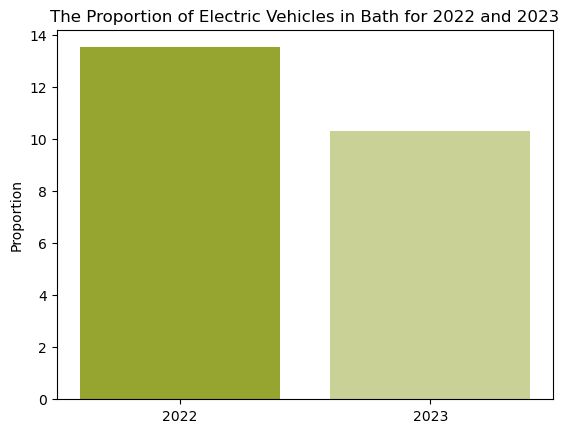

In [1896]:
import matplotlib.pyplot as plt
ev_pro_2022 = (df_2022_evg_ana['EV'].sum()/len(df_2022_evg_ana))*100 #Calculate the proportion of EVs to all cars in 2022
ev_pro_2023 = (df_2023_evg_ana['EV'].sum()/len(df_2023_evg_ana))*100 #Calculate the proportion of EVs to all cars in 2023
print(ev_pro_2022)
print(ev_pro_2023)
growth = ev_pro_2023 - ev_pro_2022
years = ['2022', '2023']
values = [ev_pro_2022, ev_pro_2023]
print ('the growth of EV adoption between 2022 and 2023' , growth,'%')

bar_2022=plt.bar('2022', ev_pro_2022, color='#96a430') # plot the bar graph of the propotion of EVs to all cars in 2022
bar_2023=plt.bar('2023', ev_pro_2023, color='#cad197') # plot the bar graph of the propotion of EVs to all cars in 2023

plt.title('The Proportion of Electric Vehicles in Bath for 2022 and 2023')
plt.ylabel('Proportion')
plt.show()

## ---------------------------------------------------------------------------------------------------------

# Brand Preference Hypothesis

# Analyse Brand preferences

## Process : 
1. Analysis of CSV File Overlap: Upon review of the previously examined CSV files, it is confirmed that the datasets containing to vehicle brands do not overlap in terms of time and direction. This allows for the utilization of all such datasets.

2. Filtering for Valid Brand data: Implement a data filtration process to exclusively retain rows where the ```'Brand'``` data is not null or missing (NaN).

3. Selection of Electric Vehicles (EVs): Further refine the dataset by selecting rows where the ```'EV'``` column is marked as '1'.

In [1897]:
df_2023_brand_ana = df_2023[df_2023['Brand'].notna()]# Select the rows where the 'Brand' values are not NaN

In [1898]:
count_value_Brand = df_2023_brand_ana[df_2023_brand_ana['EV'] == 1]['Brand'].value_counts() # Select the rows where the 'EV' values = 1.

([<matplotlib.patches.Wedge at 0x296967ad0>,
 [Text(0.7778174593052024, 0.7778174593052023, 'MG'),
  Text(-0.7778174593052023, 0.7778174593052024, 'FIAT'),
  Text(-0.7778174593052025, -0.7778174593052023, 'TESLA'),
  Text(0.7778174593052022, -0.7778174593052025, 'BMW')],
 [Text(0.4242640687119285, 0.42426406871192845, '25.0%'),
  Text(-0.42426406871192845, 0.4242640687119285, '25.0%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25.0%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.0%')])

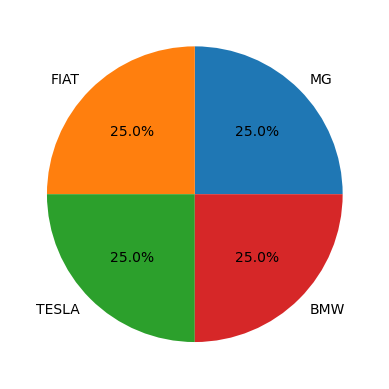

In [1899]:
plt.pie(count_value_Brand, labels=count_value_Brand.index.str.upper(), autopct='%1.1f%%')


## ---------------------------------------------------------------------------------------------------------

# Vehicle ages and EV adoption rate Hypothesis

# Analyse Age of cars.
1. Analysis of CSV file overlap: Upon review of the previously examined CSV files, it is confirmed that the datasets containing to age of cars do not overlap in terms of time and direction. This allows for the utilization of all such datasets.

2. Filtering for valid age of cars data: Implement a data filtration process to exclusively retain rows where the ```Ageofcars``` data is not null or missing (NaN).
3. Data grouping by age eange: The data will be organized into groups based on a 5-year range. For instance, cars from the years 2024 and 2022 will be grouped in the 2020-2024 range, while those from 2015 and 2017 will be categorized under 2015-2019. This grouping strategy facilitates a more structured and meaningful analysis of trends over time

In [1900]:
age_iden_df = pd.concat([df_2023,df_2022]) # concate df_2023 with df_2022.

In [1901]:
age_iden_df = age_iden_df[age_iden_df['Ageofcars'].notna()] # select rows where the Ageofcars data is not null.
age_iden_df.reset_index(drop=True,inplace=True) # Reset the indexs.

In [1902]:
age_iden_df['Ageofcars'].unique() # Check values inside the column.

array([2016, '2008/2009', '2023/2024', 2008, '2012/2013', '2021/2022',
       '2013/2014', '2011/2012', '2014/2015', '2019/2020', 2018, 2020,
       '2010/2011', 2023, '2015/2016', 2014, '2004/2005', '2016/2017',
       2009, '2009/2010', '2018/2019', 2006, '2017/2018', 2021,
       '2022/2023', '2020/2021', '2007/2008', '2005/2006', '2006/2007',
       '2000/2001', '2003/2004', 2019, 2022, 2012, 2011, 2010,
       '1981/1982', 2015, 2013, 2017, 2002, 2005, 2007, 'none', 2004,
       '1994/1995', '1988/1989', 2003], dtype=object)

In [1903]:
index = np.where(age_iden_df['Ageofcars']=='none')[0] 
age_iden_df.drop(index,axis=0,inplace=True)

In [1904]:
age_iden_df['Ageofcars'].value_counts() # check value counts

2014/2015    33
2017/2018    31
2015         30
2015/2016    29
2019/2020    22
2022/2023    22
2017         22
2016/2017    22
2013/2014    21
2010/2011    20
2012         20
2018         19
2021/2022    19
2012/2013    19
2009/2010    18
2018/2019    18
2019         18
2020/2021    16
2016         15
2014         15
2009         12
2011/2012    12
2008         12
2010         12
2004/2005    12
2011         11
2007/2008    10
2013         10
2007          9
2020          9
2008/2009     8
2023/2024     8
2021          7
2022          7
2006/2007     6
2023          6
2006          4
2005          3
2004          3
2005/2006     2
2003/2004     1
2000/2001     1
1981/1982     1
2002          1
1994/1995     1
1988/1989     1
2003          1
Name: Ageofcars, dtype: int64

In [1905]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


age_iden_df['Ageofcars'] = age_iden_df['Ageofcars'].astype(str)
age_iden_df['Ageofcars']= age_iden_df['Ageofcars'].str.split('.', expand=True)[0]


# Apply the condition and set the new value
condition = age_iden_df['Ageofcars'].isin(['2023/2024','2022/2023','2021/2022','2020/2021','2019/2020','2020','2021','2022','2023','2024'])
age_iden_df.loc[condition, 'Ageofcars'] = '2020-2024'
condition = age_iden_df['Ageofcars'].isin(['2015/2016','2016/2017','2017/2018','2018/2019','2015','2016','2017','2018','2019'])
age_iden_df.loc[condition, 'Ageofcars'] = '2015-2019'
condition = age_iden_df['Ageofcars'].isin(['2010/2011','2011/2012','2012/2013','2013/2014','2014/2015','2010','2011','2012','2013','2014'])
age_iden_df.loc[condition, 'Ageofcars'] = '2010-2014'
condition = age_iden_df['Ageofcars'].isin(['2005/2006','2006/2007','2007/2008','2008/2009','2009/2010','2005','2006','2007','2008','2009'])
age_iden_df.loc[condition, 'Ageofcars'] = '2005-2009'
condition = age_iden_df['Ageofcars'].isin(['1981/1982','1994/1995','1988/1989','2003','2002','2000/2001','2003/2004','0','2004/2005'])
age_iden_df.loc[condition, 'Ageofcars'] = 'Below 2005'



In [1906]:
count_value = age_iden_df[age_iden_df['EV']==1]['Ageofcars'].value_counts() #count the values of the column 'Ageofcars' where EV =1

In [1907]:
age_iden_df['Ageofcars'].unique() #Check values inside the column

array(['2015-2019', '2005-2009', '2020-2024', '2010-2014', 'Below 2005',
       '2004'], dtype=object)

In [1908]:
import seaborn as sns

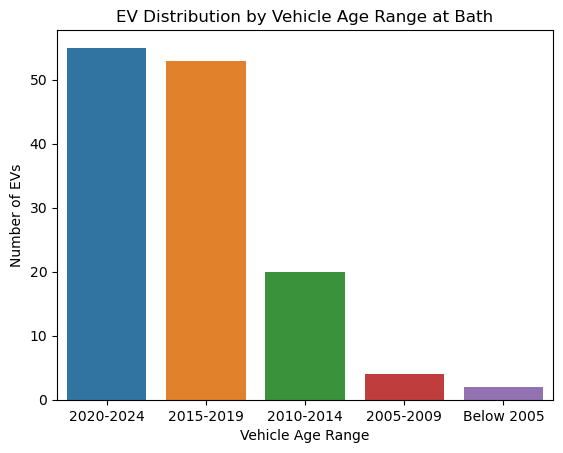

In [1909]:
count_value_df = count_value.reset_index()
count_value_df.columns = ['Ageofcars', 'Counts']

# Create the bar plot
highlighted_years = ['2020-2024', '2015-2019']

sns.barplot(x='Ageofcars', y='Counts', data=count_value_df)

# Set labels and title, if needed
plt.title('EV Distribution by Vehicle Age Range at Bath')
plt.xlabel('Vehicle Age Range')
plt.ylabel('Number of EVs')



plt.show()

## Summary of the hypothesis:
1. ```Growth Hypothesis```: Contradictive to the UK trend and the hypothesis The growth of EV adoption in the bath community decreased by 3.2% from 2022 to 2023. This trend suggests a need for the local community to address the situation.
2. ```Brand Preference Hypothesis```: Similarly, the top two popular brands in the bath community align with the UK market. By promoting the popular brands, it might help the bath community increase the EV adoption rate.
3. ```Vehicle ages and EV adoption rate hypothesis``` : As we can see from the bar chart, the trend indicates a significantly growing number of EV adoptions in the 2015–2019 and 2020–2024 time periods. We can help increase the number of EVs in the bath community by taking action on the key events during this time period.